## DATA EXTRACTION
In this section, for the purpose of easy replicability, I programmatically download and load the data from source into dataframes for using 3 helper functions:


*   `download_data_from_gdrive`
*   `extract_zip_and_list`
*   `import_csv_into_dataframes`


### Installing required libraries

In [ ]:
!pip install  --quiet gdown
import os
import gdown
import zipfile
import pandas as pd
import numpy as np

In [ ]:


def download_data_from_gdrive(url, extract_path="jail", output_filename="raw_data.zip"):
    """
    Downloads a file from Google Drive using gdown and saves it to a specified path.

    Args:
        url (str): The Google Drive URL of the file to download.
        extract_path (str, optional): The directory to save the downloaded file. Defaults to "jail".
        output_filename (str, optional): The name of the downloaded file. Defaults to "raw_data.zip".
    """
    os.makedirs(extract_path, exist_ok=True)  # Create the directory if it doesn't exist
    output_path = os.path.join(extract_path, output_filename)  # Construct the full output path
    gdown.download(url, output_path, quiet=False)  # Download the file using gdown
    print(f"File downloaded to: {output_path}")

In [ ]:
url = "https://drive.google.com/uc?id=1myW9sMtrkFT11kmtS8w5_Mwc_DlyWv6H"
download_data_from_gdrive(url)

Downloading...
From: https://drive.google.com/uc?id=1myW9sMtrkFT11kmtS8w5_Mwc_DlyWv6H
To: /content/jail/raw_data.zip
100%|██████████| 1.72M/1.72M [00:00<00:00, 15.8MB/s]

File downloaded to: jail/raw_data.zip


In [ ]:


def extract_zip_and_list(input_zip_path, output_directory):
    """
    Extracts the contents of a zip file to a specified directory and lists the files with their sizes.

    Args:
        input_zip_path (str): The path to the zip file.
        output_directory (str): The directory to extract the contents to.
    """
    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)

    # Extract the zip file
    with zipfile.ZipFile(input_zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_directory)
        print(f"Extracted {len(zip_ref.namelist())} files to {output_directory}")

    # List extracted files with their sizes
    print("\nExtracted Files:")
    for root, dirs, files in os.walk(output_directory):
        for file in files:
            file_path = os.path.join(root, file)
            file_size = os.path.getsize(file_path)
            print(f"{file} - {file_size / 1024:.2f} KB")

In [ ]:
# Specify paths
input_zip_path = "jail/raw_data.zip"
output_directory = "staging/"

# Extract and list the files
extract_zip_and_list(input_zip_path, output_directory)

Extracted 8 files to staging/

Extracted Files:
3. child-mortality-by-income-level-of-country.csv - 403.45 KB
5. number-of-maternal-deaths-by-region.csv - 203.75 KB
6. births-attended-by-health-staff-sdgs.csv - 67.97 KB
1. youth-mortality-rate.csv - 300.80 KB
2. number-of-infant-deaths-unwpp.csv - 465.08 KB
4. Distribution of Causes of Death among Children Aged less than 5 years.csv - 40052.81 KB
8. health-protection-coverage.csv - 3.61 KB
7. global-vaccination-coverage.csv - 321.71 KB


In [ ]:


def import_csv_into_dataframes(directory):
    """
    Loads multiple datasets from CSV files in a specified directory.

    Args:
        directory (str): The directory path containing the CSV files.

    Returns:
        dict: A dictionary where keys are dataset names and values are pandas DataFrames.
    """
    # Define file names and corresponding dataset keys
    datasets = {
        "youth_mortality_rate": "1. youth-mortality-rate.csv",
        "infant_deaths": "2. number-of-infant-deaths-unwpp.csv",
        "child_mortality": "3. child-mortality-by-income-level-of-country.csv",
        "cause_of_infant_deaths": "4. Distribution of Causes of Death among Children Aged less than 5 years.csv",
        "maternal_deaths": "5. number-of-maternal-deaths-by-region.csv",
        "assisted_births": "6. births-attended-by-health-staff-sdgs.csv",
        "vacc_coverage": "7. global-vaccination-coverage.csv",
        "health_protection_coverage": "8. health-protection-coverage.csv"
    }

    # Dictionary to store the loaded DataFrames
    dataframes = {}

    # Load each dataset
    for key, file_name in datasets.items():
        file_path = f"{directory}/{file_name}"
        print(f"Loading {file_name}...")
        df = pd.read_csv(file_path)
        dataframes[key] = df


    return dataframes


In [ ]:
csv_directory = "/content/staging"
dict_of_dataframes = import_csv_into_dataframes(csv_directory)

youth_mortality_rate = dict_of_dataframes['youth_mortality_rate']
infant_deaths = dict_of_dataframes['infant_deaths']
child_mortality = dict_of_dataframes['child_mortality']
cause_of_infant_deaths = dict_of_dataframes['cause_of_infant_deaths']
maternal_deaths = dict_of_dataframes['maternal_deaths']
assisted_births = dict_of_dataframes['assisted_births']
vacc_coverage = dict_of_dataframes['vacc_coverage']
health_protection_coverage = dict_of_dataframes['health_protection_coverage']

Loading 1. youth-mortality-rate.csv...
Loading 2. number-of-infant-deaths-unwpp.csv...
Loading 3. child-mortality-by-income-level-of-country.csv...
Loading 4. Distribution of Causes of Death among Children Aged less than 5 years.csv...
Loading 5. number-of-maternal-deaths-by-region.csv...
Loading 6. births-attended-by-health-staff-sdgs.csv...
Loading 7. global-vaccination-coverage.csv...
Loading 8. health-protection-coverage.csv...


## INTIAL DATA EXPLORATION AND CLEANING
In this section, I



1.   Renamed columns for clarity
2.   Explored nulls
1.   Dropped redundant and uninformative columns
2.   Transformed data from wide to long format




### Youth mortality

In [ ]:
youth_mortality_rate.head()

,Entity,Code,Year,Under-fifteen mortality rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777
2,Afghanistan,AFG,1979,28.479010
3,Afghanistan,AFG,1980,27.649078
4,Afghanistan,AFG,1981,26.834482


In [ ]:
# Rename columns for clarity
youth_mortality_rate_semi_clean = youth_mortality_rate.rename(columns={'Under-fifteen mortality rate':'u15_mortality_rate'})
youth_mortality_rate_semi_clean.head()

# "sc" stands for "semi-clean"

,Entity,Code,Year,u15_mortality_rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777
2,Afghanistan,AFG,1979,28.479010
3,Afghanistan,AFG,1980,27.649078
4,Afghanistan,AFG,1981,26.834482


In [ ]:
# Overview of dataframe
youth_mortality_rate_semi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10515 entries, 0 to 10514
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              10515 non-null  object 
 1   Code                9492 non-null   object 
 2   Year                10515 non-null  int64  
 3   u15_mortality_rate  10515 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 328.7+ KB


<Axes: >

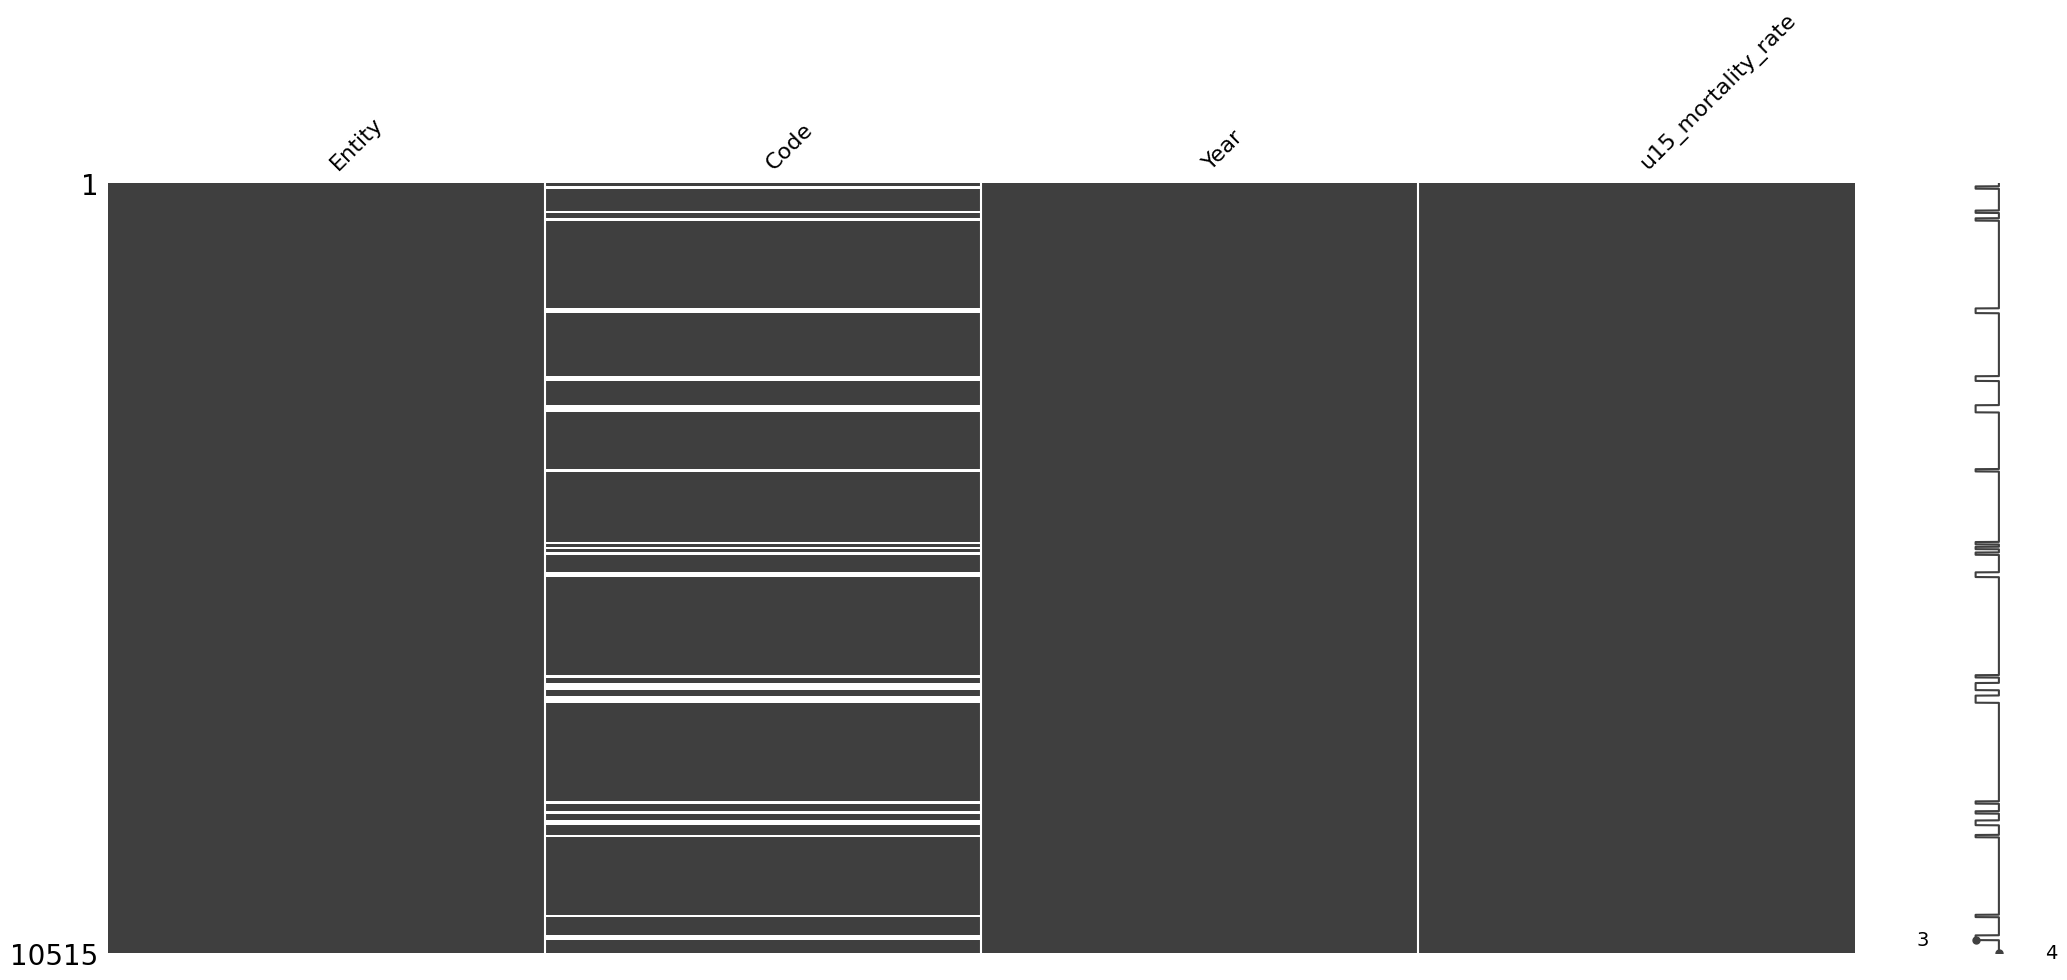

In [ ]:
## This library helps visualise missing data: the whole diagram is the a representation
# of the rows. Missing cells are represented as white streaks
import missingno as msno
msno.matrix(youth_mortality_rate_semi_clean)

#### Why are there nulls in the *Code* column?

In [ ]:
# Checking rows where Code is null
youth_mortality_rate_semi_clean[youth_mortality_rate_semi_clean['Code'].isnull()]

,Entity,Code,Year,u15_mortality_rate
46,Africa,NaN,1990,18.112036
47,Africa,NaN,1991,17.851433
48,Africa,NaN,1992,17.633772
49,Africa,NaN,1993,17.437640
50,Africa,NaN,1994,17.499060
...,...,...,...,...
10334,Western Asia and Northern Africa (SDG),NaN,2018,3.112306
10335,Western Asia and Northern Africa (SDG),NaN,2019,2.968215
10336,Western Asia and Northern Africa (SDG),NaN,2020,2.851951
10337,Western Asia and Northern Africa (SDG),NaN,2021,2.802823


It seems regions where *Code* is null are not countries but region. So it makes sense that they do not have country codes

In [ ]:
# This confirms my intuition
print("REGIONS: ",youth_mortality_rate_semi_clean[youth_mortality_rate_semi_clean['Code'].isnull()]["Entity"].unique(),"\n")
print("COUNTRIES: ",youth_mortality_rate_semi_clean[~youth_mortality_rate_semi_clean['Code'].isnull()]["Entity"].unique())

REGIONS:  ['Africa' 'Asia' 'Australia and New Zealand' 'Central Asia (SDG)'
 'Central Asia and Southern Asia (SDG)' 'Eastern Asia (SDG)'
 'Eastern Asia and South-Eastern Asia (SDG)' 'Europe' 'Europe (SDG)'
 'European Union (27)' 'High-income countries'
 'Landlocked developing countries (SDG)'
 'Latin America and the Caribbean (SDG)' 'Least developed countries (SDG)'
 'Low-income countries' 'Lower-middle-income countries' 'North America'
 'Northern Africa (SDG)' 'Northern America (SDG)'
 'Northern America and Europe (SDG)' 'Oceania' 'Oceania (SDG)'
 'Oceania excluding Australia and New Zealand'
 'Small island developing States (SDG)' 'South America'
 'South-Eastern Asia (SDG)' 'Southern Asia (SDG)'
 'Sub-Saharan Africa (SDG)' 'Upper-middle-income countries'
 'Western Asia (SDG)' 'Western Asia and Northern Africa (SDG)'] 

COUNTRIES:  ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas'

In [ ]:
# Final check to see if there are nulls in entities that are countries
youth_mortality_rate_semi_clean[~youth_mortality_rate_semi_clean['Code'].isnull()].isnull().sum()

,0
Entity,0
Code,0
Year,0
u15_mortality_rate,0


CONCLUSION:
Since this report is focused on Africa, these regions will be filtered off later

In [ ]:
# regions = youth_mortality_rate_semi_clean[youth_mortality_rate_semi_clean['Code'].isnull()]["Entity"].unique()

In [ ]:
# youth_mortality_rate_clean = youth_mortality_rate_semi_clean[~youth_mortality_rate_semi_clean['Entity'].isin(regions)]

In [ ]:
# youth_mortality_rate_clean

### Infant deaths

In [ ]:
infant_deaths.head()

,Entity,Code,Year,Deaths - Sex: all - Age: 0 - Variant: estimates
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0
2,Afghanistan,AFG,1952,108140.0
3,Afghanistan,AFG,1953,108248.0
4,Afghanistan,AFG,1954,108241.0


In [ ]:
infant_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           18944 non-null  object 
 1   Code                                             17612 non-null  object 
 2   Year                                             18944 non-null  int64  
 3   Deaths - Sex: all - Age: 0 - Variant: estimates  18944 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 592.1+ KB


In [ ]:
infant_deaths_semi_clean = infant_deaths.rename(columns={'Deaths - Sex: all - Age: 0 - Variant: estimates':'deaths_at_age_zero'})

<Axes: >

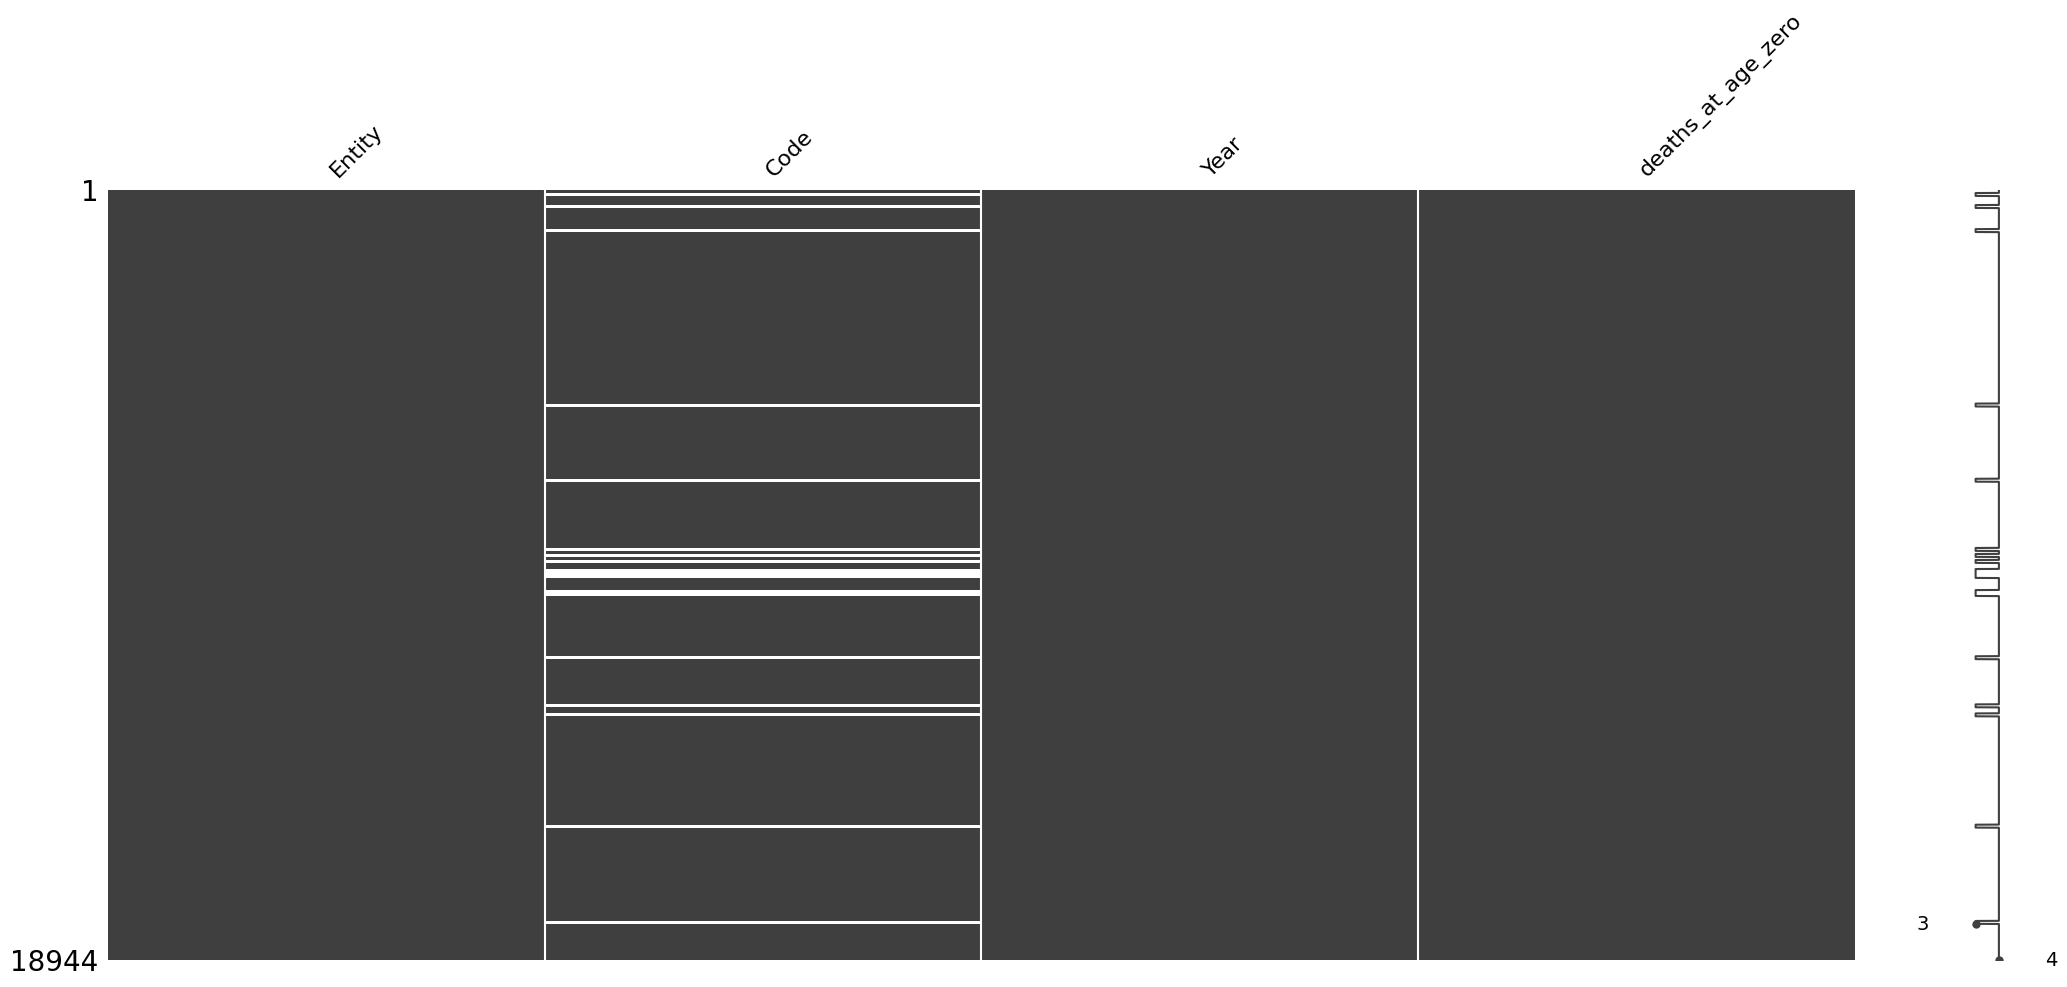

In [ ]:
import missingno as msno
msno.matrix(infant_deaths_semi_clean)

Reason for nulls in the *Code* column has been explored in **Youth Mortality** section ablove

### Child mortality

In [ ]:
child_mortality.head()

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


In [ ]:
child_mortality_semi_clean = child_mortality.rename(columns={'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births':'u5_mortality_rates'})
child_mortality_semi_clean.head()

,Entity,Code,Year,u5_mortality_rates
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


In [ ]:
child_mortality_semi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              14200 non-null  object 
 1   Code                12842 non-null  object 
 2   Year                14200 non-null  int64  
 3   u5_mortality_rates  14200 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 443.9+ KB


### Cause of infact deaths

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
cause_of_infant_deaths.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,NaN,NaN,NaN,NaN,NaN,NaN,0.0006,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Injuries,CHILDCAUSE_CH17,NaN,NaN,NaN,NaN,NaN,NaN,0.0110,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
2,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,HIV/AIDS,CHILDCAUSE_CH2,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
3,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Diarrhoeal diseases,CHILDCAUSE_CH3,NaN,NaN,NaN,NaN,NaN,NaN,0.0110,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
4,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Tetanus,CHILDCAUSE_CH5,NaN,NaN,NaN,NaN,NaN,NaN,0.0270,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z


In [ ]:
# constant value columns. I do not need them
constant_values = [column for column in cause_of_infant_deaths.columns if cause_of_infant_deaths[column].nunique() == 1]

In [ ]:
# Columns with only nulls
only_nulls = [column for column in cause_of_infant_deaths.columns if cause_of_infant_deaths[column].isnull().sum() == cause_of_infant_deaths.shape[0]]

In [ ]:
columns_to_remove = list(set(constant_values + only_nulls))
cause_of_infant_deaths_semi_clean = cause_of_infant_deaths.drop(columns=cause_of_infant_deaths.columns.intersection(columns_to_remove))

In [ ]:
cause_of_infant_deaths_semi_clean.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1,Dim1ValueCode,Dim2,Dim2ValueCode,FactValueNumeric,Value
0,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Other noncommunicable diseases,CHILDCAUSE_CH16,0.0006,0.0
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Injuries,CHILDCAUSE_CH17,0.0110,0.0
2,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,HIV/AIDS,CHILDCAUSE_CH2,0.0000,0.0
3,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Diarrhoeal diseases,CHILDCAUSE_CH3,0.0110,0.0
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,True,0-27 days,AGEGROUP_DAYS0-27,Tetanus,CHILDCAUSE_CH5,0.0270,0.0


In [ ]:
relevant_columns = ['ParentLocation', 'SpatialDimValueCode', 'Location', 'Dim1', 'Dim2', 'Period', 'FactValueNumeric']
cause_of_infant_deaths_semi_clean = cause_of_infant_deaths_semi_clean[relevant_columns]

In [ ]:
cause_of_infant_deaths_semi_clean.melt(id_vars= ["ParentLocation", "SpatialDimValueCode", "Location", "Period"],
                                               value_vars= cause_of_infant_deaths_semi_clean.iloc[:,3:].columns.to_list(),
                                               var_name= "Year").rename(columns = {"Dim1": "age_group",
                                                                                   "Dim2":"cause_of_death"})

,ParentLocation,SpatialDimValueCode,Location,Period,Year,value
0,Eastern Mediterranean,AFG,Afghanistan,2017,Dim1,0-27 days
1,Eastern Mediterranean,AFG,Afghanistan,2017,Dim1,0-27 days
2,Eastern Mediterranean,AFG,Afghanistan,2017,Dim1,0-27 days
3,Eastern Mediterranean,AFG,Afghanistan,2017,Dim1,0-27 days
4,Eastern Mediterranean,AFG,Afghanistan,2017,Dim1,0-27 days
...,...,...,...,...,...,...
439987,Europe,GBR,United Kingdom of Great Britain and Northern I...,2000,FactValueNumeric,0.56
439988,Europe,AND,Andorra,2000,FactValueNumeric,0.66
439989,Europe,AND,Andorra,2000,FactValueNumeric,1.0
439990,Europe,SMR,San Marino,2000,FactValueNumeric,1.0


In [ ]:
cause_of_infant_deaths_semi_clean = cause_of_infant_deaths_semi_clean.rename(columns = {"Dim1": "age_group", "Dim2":"cause_of_death","FactValueNumeric": "%_deaths_attributed_to_this_cause"})

In [ ]:
cause_of_infant_deaths_semi_clean

,ParentLocation,SpatialDimValueCode,Location,age_group,cause_of_death,Period,%_deaths_attributed_to_this_cause
0,Eastern Mediterranean,AFG,Afghanistan,0-27 days,Other noncommunicable diseases,2017,0.0006
1,Eastern Mediterranean,AFG,Afghanistan,0-27 days,Injuries,2017,0.0110
2,Eastern Mediterranean,AFG,Afghanistan,0-27 days,HIV/AIDS,2017,0.0000
3,Eastern Mediterranean,AFG,Afghanistan,0-27 days,Diarrhoeal diseases,2017,0.0110
4,Eastern Mediterranean,AFG,Afghanistan,0-27 days,Tetanus,2017,0.0270
...,...,...,...,...,...,...,...
146659,Europe,GBR,United Kingdom of Great Britain and Northern I...,0-27 days,Prematurity,2000,0.5600
146660,Europe,AND,Andorra,0-4 years,Prematurity,2000,0.6600
146661,Europe,AND,Andorra,0-27 days,Prematurity,2000,1.0000
146662,Europe,SMR,San Marino,1-59 months,Congenital anomalies,2000,1.0000


<Axes: >

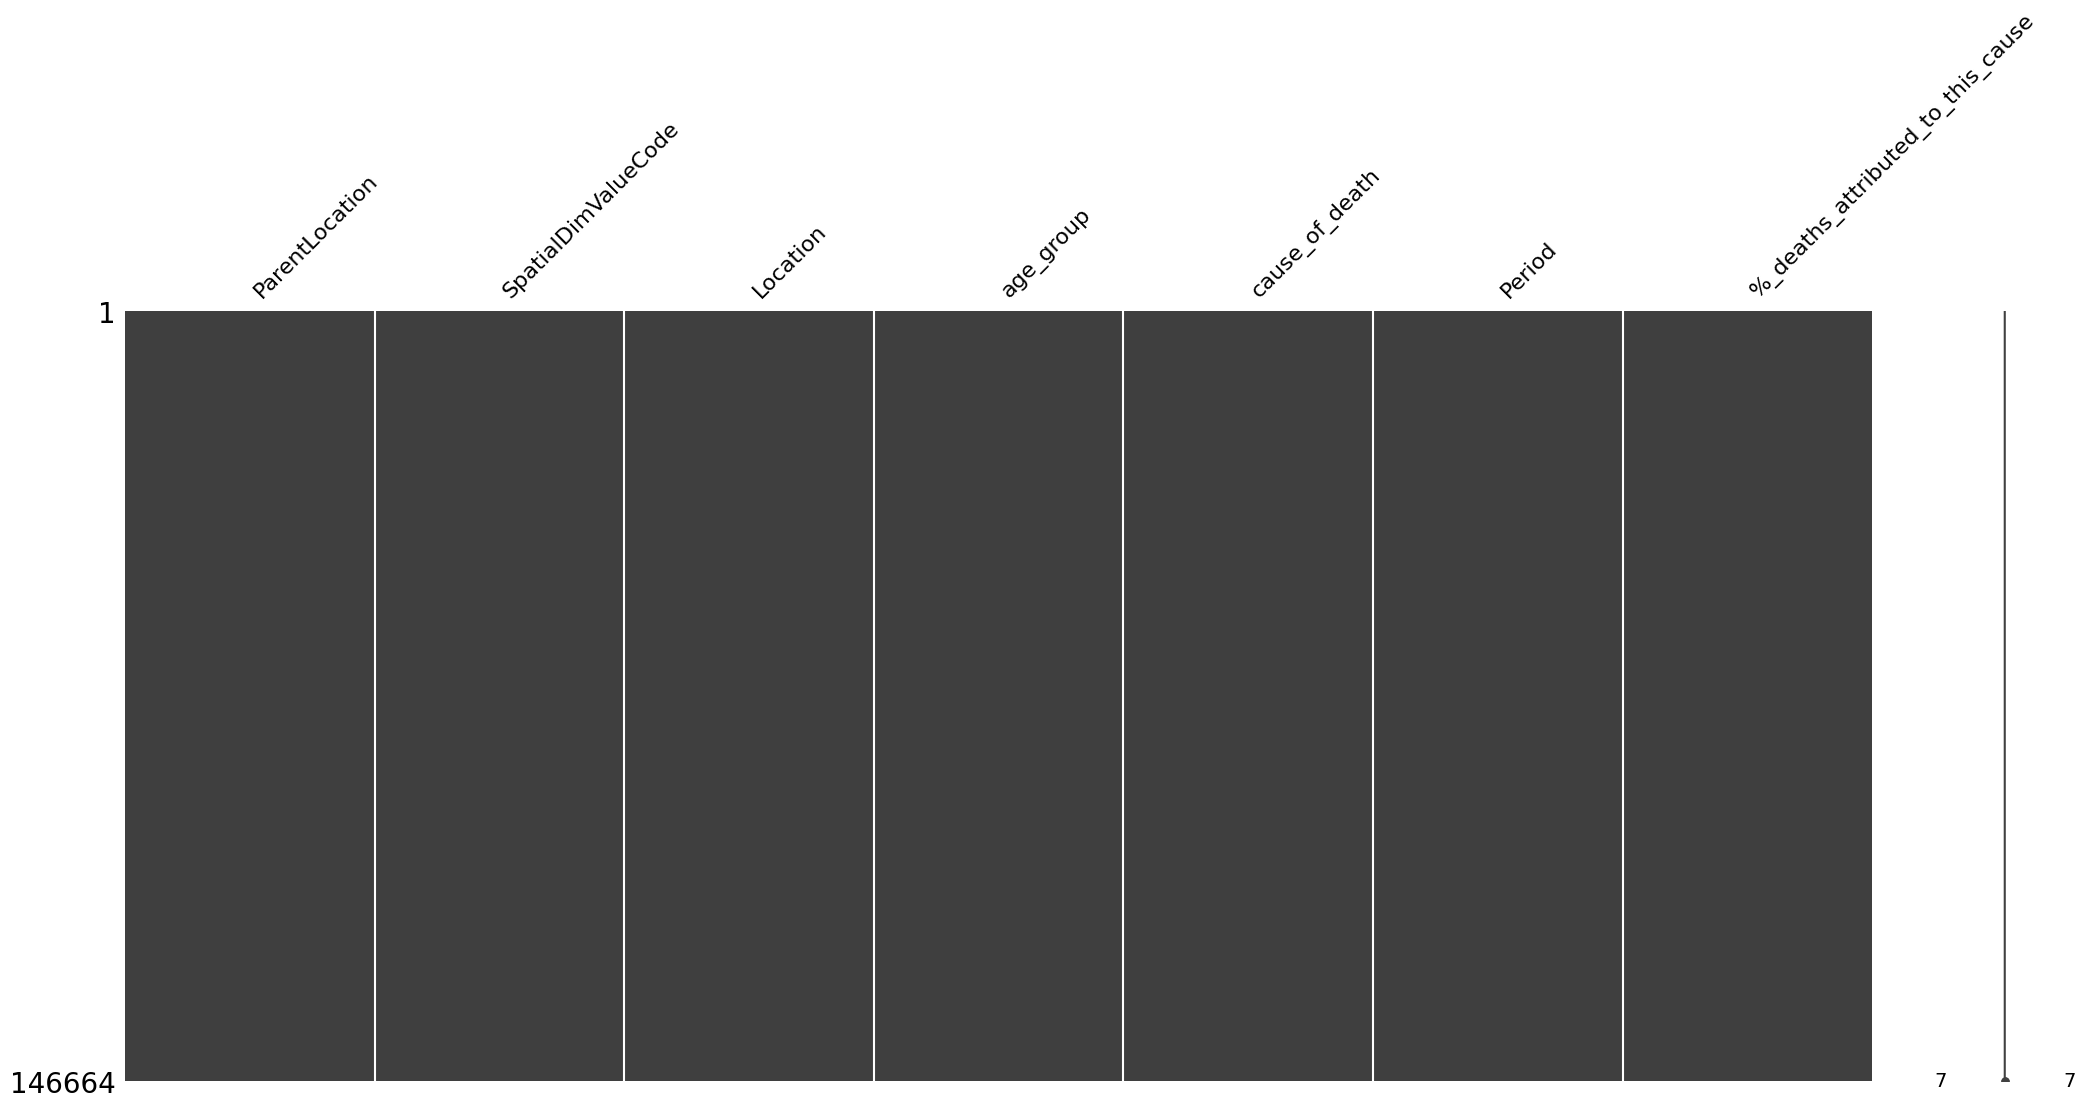

In [ ]:
msno.matrix(cause_of_infant_deaths_semi_clean)

### Maternal deaths

In [ ]:
maternal_deaths.head()

,Entity,Code,Year,Estimated maternal deaths,959828-annotations
0,Afghanistan,AFG,1985,10258.5340,NaN
1,Afghanistan,AFG,1986,8671.9210,NaN
2,Afghanistan,AFG,1987,8488.9600,NaN
3,Afghanistan,AFG,1988,7522.1216,NaN
4,Afghanistan,AFG,1989,7549.7050,NaN


In [ ]:
maternal_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     7056 non-null   object 
 1   Code                       6696 non-null   object 
 2   Year                       7056 non-null   int64  
 3   Estimated maternal deaths  7056 non-null   float64
 4   959828-annotations         36 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 275.8+ KB


In [ ]:
maternal_deaths_semi_clean = maternal_deaths.drop(columns=["959828-annotations"])
maternal_deaths_semi_clean = maternal_deaths_semi_clean.rename(columns={"Estimated maternal deaths":"est_maternal_deaths"})


In [ ]:
maternal_deaths_semi_clean.head()

,Entity,Code,Year,est_maternal_deaths
0,Afghanistan,AFG,1985,10258.5340
1,Afghanistan,AFG,1986,8671.9210
2,Afghanistan,AFG,1987,8488.9600
3,Afghanistan,AFG,1988,7522.1216
4,Afghanistan,AFG,1989,7549.7050


### Assisted births

In [ ]:
assisted_births.head()

,Entity,Code,Year,Births attended by skilled health staff (% of total)
0,Afghanistan,AFG,2000,12.4
1,Afghanistan,AFG,2003,14.3
2,Afghanistan,AFG,2006,18.9
3,Afghanistan,AFG,2008,24.0
4,Afghanistan,AFG,2010,34.3


In [ ]:
assisted_births_semi_clean = assisted_births.rename(columns={"Births attended by skilled health staff (% of total)":"births_by_skilled_staff_(%)"})

In [ ]:
assisted_births_semi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       2985 non-null   object 
 1   Code                         2943 non-null   object 
 2   Year                         2985 non-null   int64  
 3   births_by_skilled_staff_(%)  2985 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 93.4+ KB


### Vaccination coverage

In [ ]:
print(vacc_coverage.head())

        Entity Code  Year  BCG (% of one-year-olds immunized)  \
0  Afghanistan  AFG  1982                                10.0   
1  Afghanistan  AFG  1983                                10.0   
2  Afghanistan  AFG  1984                                11.0   
3  Afghanistan  AFG  1985                                17.0   
4  Afghanistan  AFG  1986                                18.0   

   HepB3 (% of one-year-olds immunized)  Hib3 (% of one-year-olds immunized)  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                                   NaN                                  NaN   
3                                   NaN                                  NaN   
4                                   NaN                                  NaN   

   IPV1 (% of one-year-olds immunized)  MCV1 (% of one-year-olds immunized)  \
0                                  NaN           

In [ ]:
vacc_coverage_semi_clean = vacc_coverage.rename(columns={
    "BCG (% of one-year-olds immunized)": "BCG",
    "HepB3 (% of one-year-olds immunized)": "HepB3",
    "Hib3 (% of one-year-olds immunized)": "Hib3",
    "IPV1 (% of one-year-olds immunized)": "IPV1",
    "MCV1 (% of one-year-olds immunized)": "MCV1",
    "PCV3 (% of one-year-olds immunized)": "PCV3",
    "Pol3 (% of one-year-olds immunized)": "Pol3",
    "RCV1 (% of one-year-olds immunized)": "RCV1",
    "RotaC (% of one-year-olds immunized)": "RotaC",
    "YFV (% of one-year-olds immunized)": "YFV",
    "DTP3 (% of one-year-olds immunized)": "DTP3"
})

In [ ]:
vacc_coverage_semi_clean = pd.melt(vacc_coverage_semi_clean,
                                   id_vars=['Entity', 'Code', 'Year'],
                   value_vars=['BCG', 'HepB3', 'Hib3', 'IPV1', 'MCV1', 'PCV3', 'Pol3', 'RCV1', 'RotaC', 'YFV', 'DTP3'],
                   var_name='vaccination_coverage_metrics',
                   value_name='vaccination_coverage')


In [ ]:
vacc_coverage_semi_clean.head()

,Entity,Code,Year,vaccination_coverage_metrics,vaccination_coverage
0,Afghanistan,AFG,1982,BCG,10.0
1,Afghanistan,AFG,1983,BCG,10.0
2,Afghanistan,AFG,1984,BCG,11.0
3,Afghanistan,AFG,1985,BCG,17.0
4,Afghanistan,AFG,1986,BCG,18.0


### Health protection coverage


In [ ]:
health_protection_coverage.head()

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014))
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1


In [ ]:
health_protection_coverage_semi_clean = health_protection_coverage.rename(columns={"Share of population covered by health insurance (ILO (2014))":"%_health_insured"})

In [ ]:
health_protection_coverage_semi_clean.head()

,Entity,Code,Year,%_health_insured
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1


In [ ]:
health_protection_coverage_semi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            162 non-null    object 
 1   Code              162 non-null    object 
 2   Year              162 non-null    int64  
 3   %_health_insured  162 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ KB


## CREATING FINAL DATASET

In [ ]:
sorted_dataframes = sorted(dict_of_dataframes.items(), key=lambda item: item[1].shape[0], reverse=True)

for name, df in sorted_dataframes:
    print(f"{name}: {df.shape[0]} rows")

cause_of_infant_deaths: 146664 rows
infant_deaths: 18944 rows
child_mortality: 14200 rows
youth_mortality_rate: 10515 rows
vacc_coverage: 7897 rows
maternal_deaths: 7056 rows
assisted_births: 2985 rows
health_protection_coverage: 162 rows


In [ ]:
# def merge_health_datasets(
#     cause_of_infant_deaths_semi_clean,
#     infant_deaths_semi_clean,
#     child_mortality_semi_clean,
#     youth_mortality_rate_semi_clean,
#     vacc_coverage_semi_clean,
#     maternal_deaths_semi_clean,
#     assisted_births_semi_clean,
#     health_protection_coverage_semi_clean,
# ):
#     """
#     Merge multiple health-related datasets on 'Code' and 'Year'.

#     Args:
#         cause_of_infant_deaths_semi_clean (pd.DataFrame): Cause of infant deaths dataset.
#         infant_deaths_semi_clean (pd.DataFrame): Infant deaths dataset.
#         child_mortality_semi_clean (pd.DataFrame): Child mortality dataset.
#         youth_mortality_rate_semi_clean (pd.DataFrame): Youth mortality rate dataset.
#         vacc_coverage_semi_clean (pd.DataFrame): Vaccination coverage dataset.
#         maternal_deaths_semi_clean (pd.DataFrame): Maternal deaths dataset.
#         assisted_births_semi_clean (pd.DataFrame): Assisted births dataset.
#         health_protection_coverage_semi_clean (pd.DataFrame): Health protection coverage dataset.

#     Returns:
#         pd.DataFrame: Merged dataset.
#     """

#     # Rename columns for consistency
#     cause_of_infant_deaths_semi_clean = cause_of_infant_deaths_semi_clean.rename(
#         columns={"SpatialDimValueCode": "Code", "Period": "Year"}
#     )

#     # Merge datasets
#     merged_data = (
#         cause_of_infant_deaths_semi_clean
#         .merge(infant_deaths_semi_clean, on=["Code", "Year"], how="outer")
#         .drop(columns=["Location"])
#     )

#     # Drop unnecessary columns and merge
#     merged_data = (
#         merged_data
#         .merge(child_mortality_semi_clean.drop(columns=["Entity"]), on=["Code", "Year"], how="outer")
#         .merge(youth_mortality_rate_semi_clean, on=["Code", "Year"], how="outer")
#         .merge(vacc_coverage_semi_clean.drop(columns=["Entity"]), on=["Code", "Year"], how="outer")
#         .merge(maternal_deaths_semi_clean.drop(columns=["Entity"]), on=["Code", "Year"], how="outer")
#         .merge(assisted_births_semi_clean, on=["Code", "Year"], how="outer")
#         .merge(health_protection_coverage_semi_clean.drop(columns=["Entity"]), on=["Code", "Year"], how="outer")
#     )

#     return merged_data

In [ ]:
cause_of_infant_deaths_semi_clean = cause_of_infant_deaths_semi_clean.rename(columns={'SpatialDimValueCode':'Code', 'Period': 'Year'})

In [ ]:
# Unique codes and years in each dataframe
print("Codes in merged_data but not in health_protection_coverage_semi_clean:")
print(set(cause_of_infant_deaths_semi_clean['Code']) - set(infant_deaths_semi_clean['Code']))

print("Years in cause_of_infant_deaths_semi_clean but not in infant_deaths_semi_clean:")
print(set(cause_of_infant_deaths_semi_clean['Year']) - set(infant_deaths_semi_clean['Year']))

Codes in merged_data but not in health_protection_coverage_semi_clean:
set()
Years in cause_of_infant_deaths_semi_clean but not in infant_deaths_semi_clean:
set()


In [ ]:
merged_data = cause_of_infant_deaths_semi_clean.merge(infant_deaths_semi_clean, on = ["Code", 'Year'], how="inner")

merged_data.drop(columns=["Location"], inplace=True)


In [ ]:
# Unique codes and years in each dataframe
print("Codes in merged_data but not in health_protection_coverage_semi_clean:")
print(set(merged_data['Code']) - set(child_mortality_semi_clean['Code']))

print("Years in merged_data but not in child_mortality_semi_clean:")
print(set(merged_data['Year']) - set(child_mortality_semi_clean['Year']))

Codes in merged_data but not in health_protection_coverage_semi_clean:
set()
Years in merged_data but not in child_mortality_semi_clean:
set()


In [ ]:

child_mortality_semi_clean.drop(columns=["Entity"], inplace=True)

merged_data = merged_data.merge(child_mortality_semi_clean, on = ["Code", 'Year'], how="inner")

merged_data = merged_data.merge(youth_mortality_rate_semi_clean, on = ["Code", 'Year'], how="inner")

In [ ]:
# Unique codes and years in each dataframe
print("Codes in merged_data but not in vacc_coverage_semi_clean:")
print(set(merged_data['Code']) - set(vacc_coverage_semi_clean['Code']))

print("Years in merged_data but not in vacc_coverage_semi_clean:")
print(set(merged_data['Year']) - set(vacc_coverage_semi_clean['Year']))

Codes in merged_data but not in vacc_coverage_semi_clean:
set()
Years in merged_data but not in vacc_coverage_semi_clean:
set()


In [ ]:
vacc_coverage_semi_clean.drop(columns=["Entity"], inplace=True)

merged_data = merged_data.merge(vacc_coverage_semi_clean, on = ["Code", 'Year'], how="inner")

maternal_deaths_semi_clean.drop(columns=["Entity"], inplace=True)


In [ ]:
# Unique codes and years in each dataframe
print("Codes in merged_data but not in maternal_deaths_semi_clean:")
print(set(merged_data['Code']) - set(maternal_deaths_semi_clean['Code']))

print("Years in merged_data but not in maternal_deaths_semi_clean:")
print(set(merged_data['Year']) - set(maternal_deaths_semi_clean['Year']))

Codes in merged_data but not in maternal_deaths_semi_clean:
{'KNA', 'AND', 'NIU', 'TUV', 'MCO', 'COK', 'MHL', 'NRU', 'SMR', 'DMA', 'PLW'}
Years in merged_data but not in maternal_deaths_semi_clean:
set()


Check fails. I will proceed to use left join instead of inner join to keep the data in the accumulated merged dataframe

In [ ]:
merged_data = merged_data.merge(maternal_deaths_semi_clean, on=["Code", "Year"], how="left")



In [ ]:
missing_codes = {'KNA', 'AND', 'NIU', 'TUV', 'MCO', 'COK', 'MHL', 'NRU', 'SMR', 'DMA', 'PLW'}
merged_data[merged_data['Code'].isin(missing_codes)].ParentLocation.unique()

array(['Europe', 'Western Pacific', 'Americas'], dtype=object)

It seems these data belong to countries not in Africa so it does not matter anyway for the purpose of this analysis

In [ ]:
# Unique codes and years in each dataframe
print("Codes in merged_data but not in assisted_births_semi_clean:")
print(set(merged_data['Code']) - set(assisted_births_semi_clean['Code']))

print("Years in merged_data but not in assisted_births_semi_clean:")
print(set(merged_data['Year']) - set(assisted_births_semi_clean['Year']))

Codes in merged_data but not in assisted_births_semi_clean:
{'NIU', 'MCO', 'SMR', 'COK'}
Years in merged_data but not in assisted_births_semi_clean:
set()


In [ ]:
merged_data = merged_data.merge(assisted_births_semi_clean, on = ["Code", 'Year'], how="left")

In [ ]:
missing_codes = {'NIU', 'MCO', 'SMR', 'COK'}
merged_data[merged_data['Code'].isin(missing_codes)].ParentLocation.unique()

array(['Western Pacific', 'Europe'], dtype=object)

In [ ]:
health_protection_coverage_semi_clean.head()

,Entity,Code,Year,%_health_insured
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1


In [ ]:
# Unique codes and years in each dataframe
print("Codes in merged_data but not in health_protection_coverage_semi_clean:")
print(set(merged_data['Code']) - set(health_protection_coverage_semi_clean['Code']))

print("Years in merged_data but not in health_protection_coverage_semi_clean:")
print(set(merged_data['Year']) - set(health_protection_coverage_semi_clean['Year']))

Codes in merged_data but not in health_protection_coverage_semi_clean:
{'FSM', 'COG', 'LBR', 'AFG', 'MCO', 'PRK', 'MMR', 'IRQ', 'PLW', 'SLB', 'TTO', 'SOM', 'COK', 'TLS', 'SAU', 'TCD', 'SSD', 'KIR', 'AND', 'PNG', 'BWA', 'SUR', 'CPV', 'TUV', 'WSM', 'MOZ', 'MHL', 'SMR', 'ETH', 'SYC', 'NIU', 'LBY', 'GNQ', 'NRU', 'COM', 'MWI', 'TON', 'ERI'}
Years in merged_data but not in health_protection_coverage_semi_clean:
{2016, 2017, 2000, 2002, 2012, 2013, 2014, 2015}


In [ ]:
african_country_codes = merged_data[merged_data['ParentLocation'] == 'Africa']['Code'].unique().tolist()

In [ ]:
health_insurance_country_codes = health_protection_coverage_semi_clean['Code'].unique()

# Find missing codes
missing_codes = [code for code in african_country_codes if code not in health_insurance_country_codes]

# Calculate and print missing percentage
missing_percentage = (len(missing_codes) / len(african_country_codes)) * 100
print(f"Missing African Country Codes: {missing_codes}")
print(f"Percentage Missing: {missing_percentage:.2f}%")

Missing African Country Codes: ['BWA', 'CPV', 'TCD', 'COM', 'COG', 'GNQ', 'ERI', 'ETH', 'LBR', 'MWI', 'MOZ', 'SYC', 'SSD']
Percentage Missing: 27.66%


Almost 30% of African countries are not in this dataframe. Hence, I will proceed with a left join.

Also I noticed that the insurance data is not per year. so I will not join on year

In [ ]:
health_protection_coverage_semi_clean.drop(columns=["Entity","Year"], inplace=True)

merged_data = merged_data.merge(health_protection_coverage_semi_clean, on = ["Code"], how="left")

In [ ]:
# dataset = merge_health_datasets(
#     cause_of_infant_deaths_semi_clean,
#     infant_deaths_semi_clean,
#     child_mortality_semi_clean,
#     youth_mortality_rate_semi_clean,
#     vacc_coverage_semi_clean,
#     maternal_deaths_semi_clean,
#     assisted_births_semi_clean,
#     health_protection_coverage_semi_clean,
# )

<Axes: >

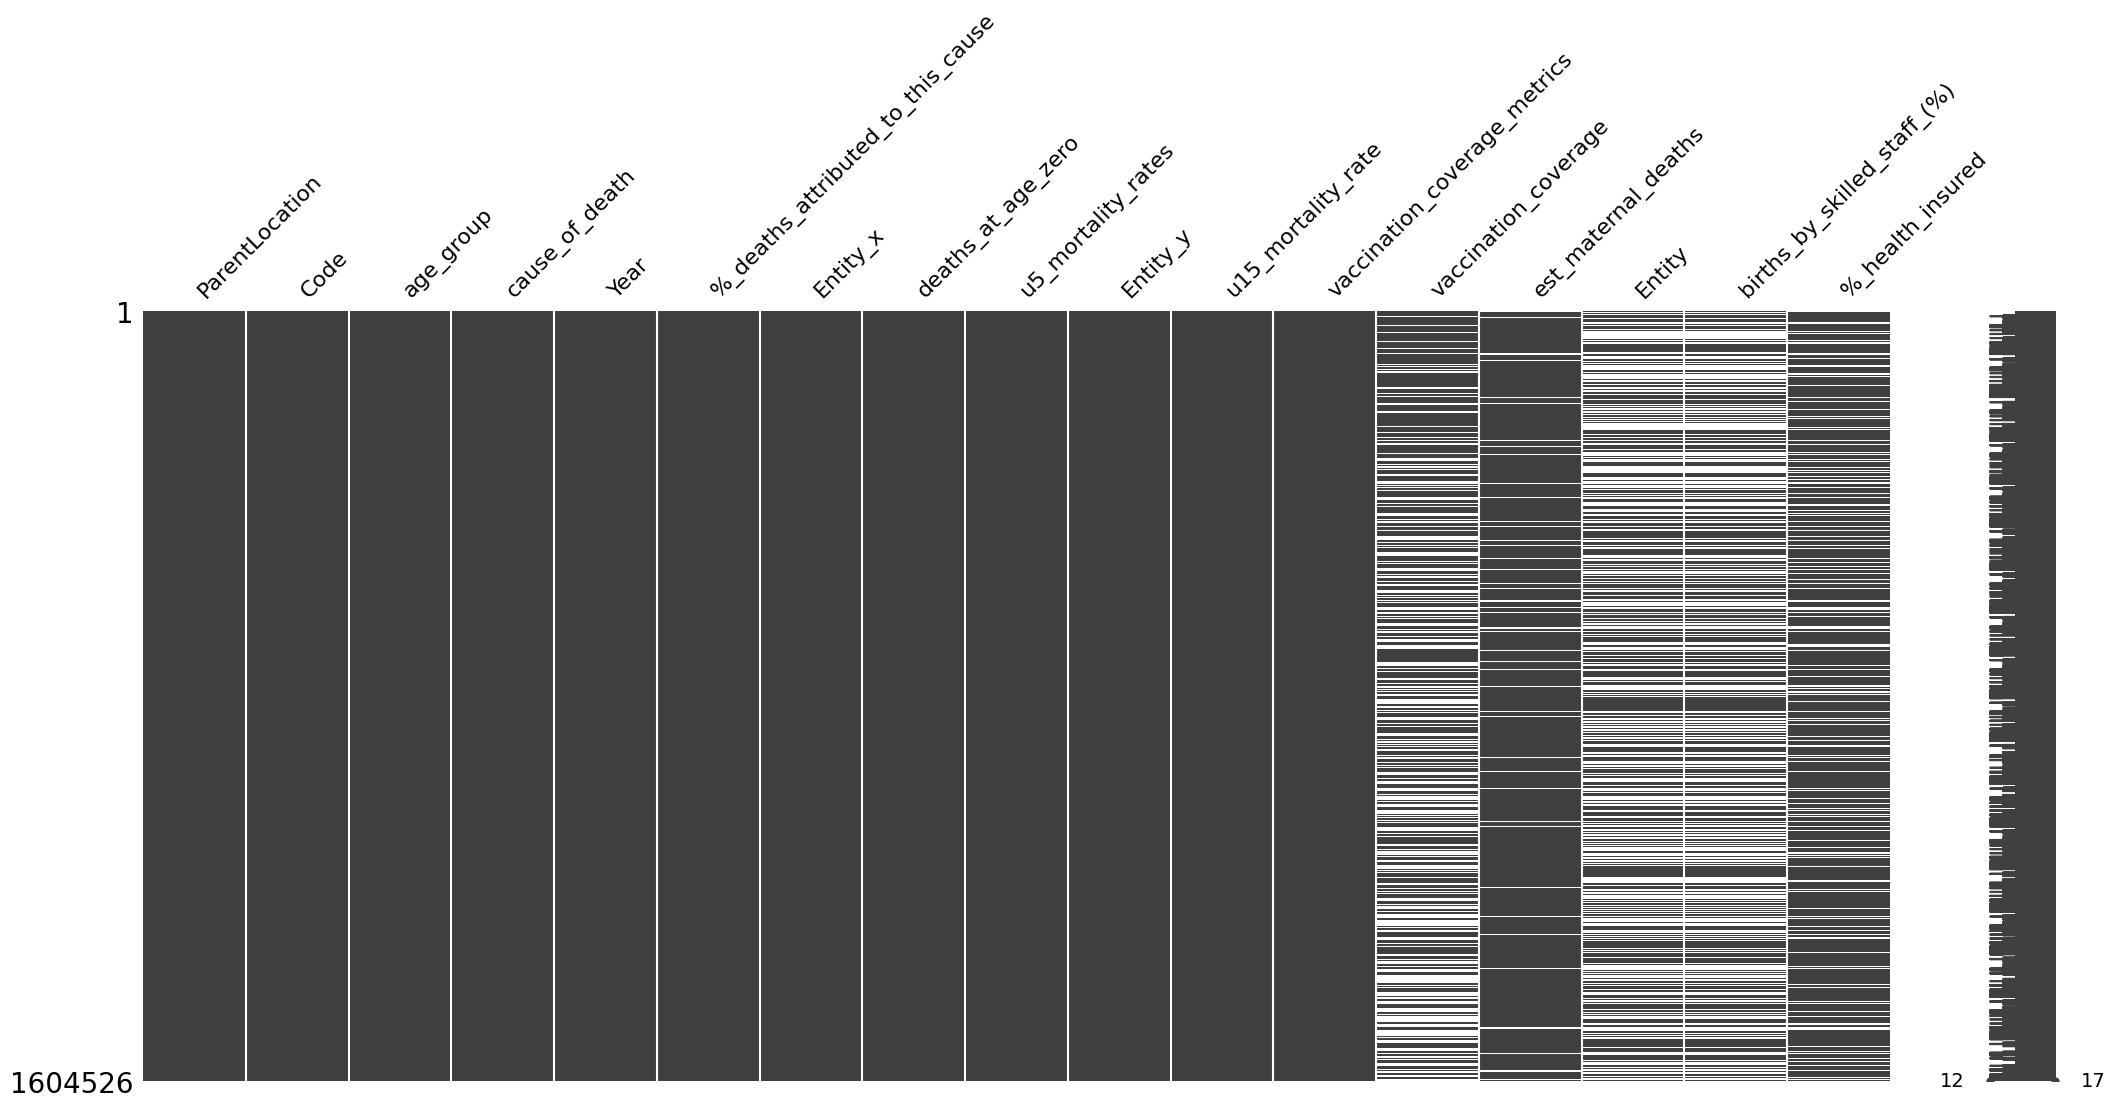

In [ ]:
msno.matrix(merged_data)

In [ ]:
data_africa_only = merged_data[merged_data["ParentLocation"]=="Africa"]

In [ ]:
data_africa = data_africa_only.drop(columns=["ParentLocation","Code","Entity", "Entity_x"]).rename(columns={"Entity_y":"Country"})

# .to_csv("clean_data_africa.csv", index=False)

In [ ]:
# Reordering columns meaningfully
column_order = ['Country', 'Year', 'age_group', 'cause_of_death', 'vaccination_coverage_metrics',
                'births_by_skilled_staff_(%)', '%_health_insured',
                'deaths_at_age_zero', 'u5_mortality_rates', 'u15_mortality_rate',
                'est_maternal_deaths', '%_deaths_attributed_to_this_cause', 'vaccination_coverage']

clean_data_africa = data_africa[column_order]

<Axes: >

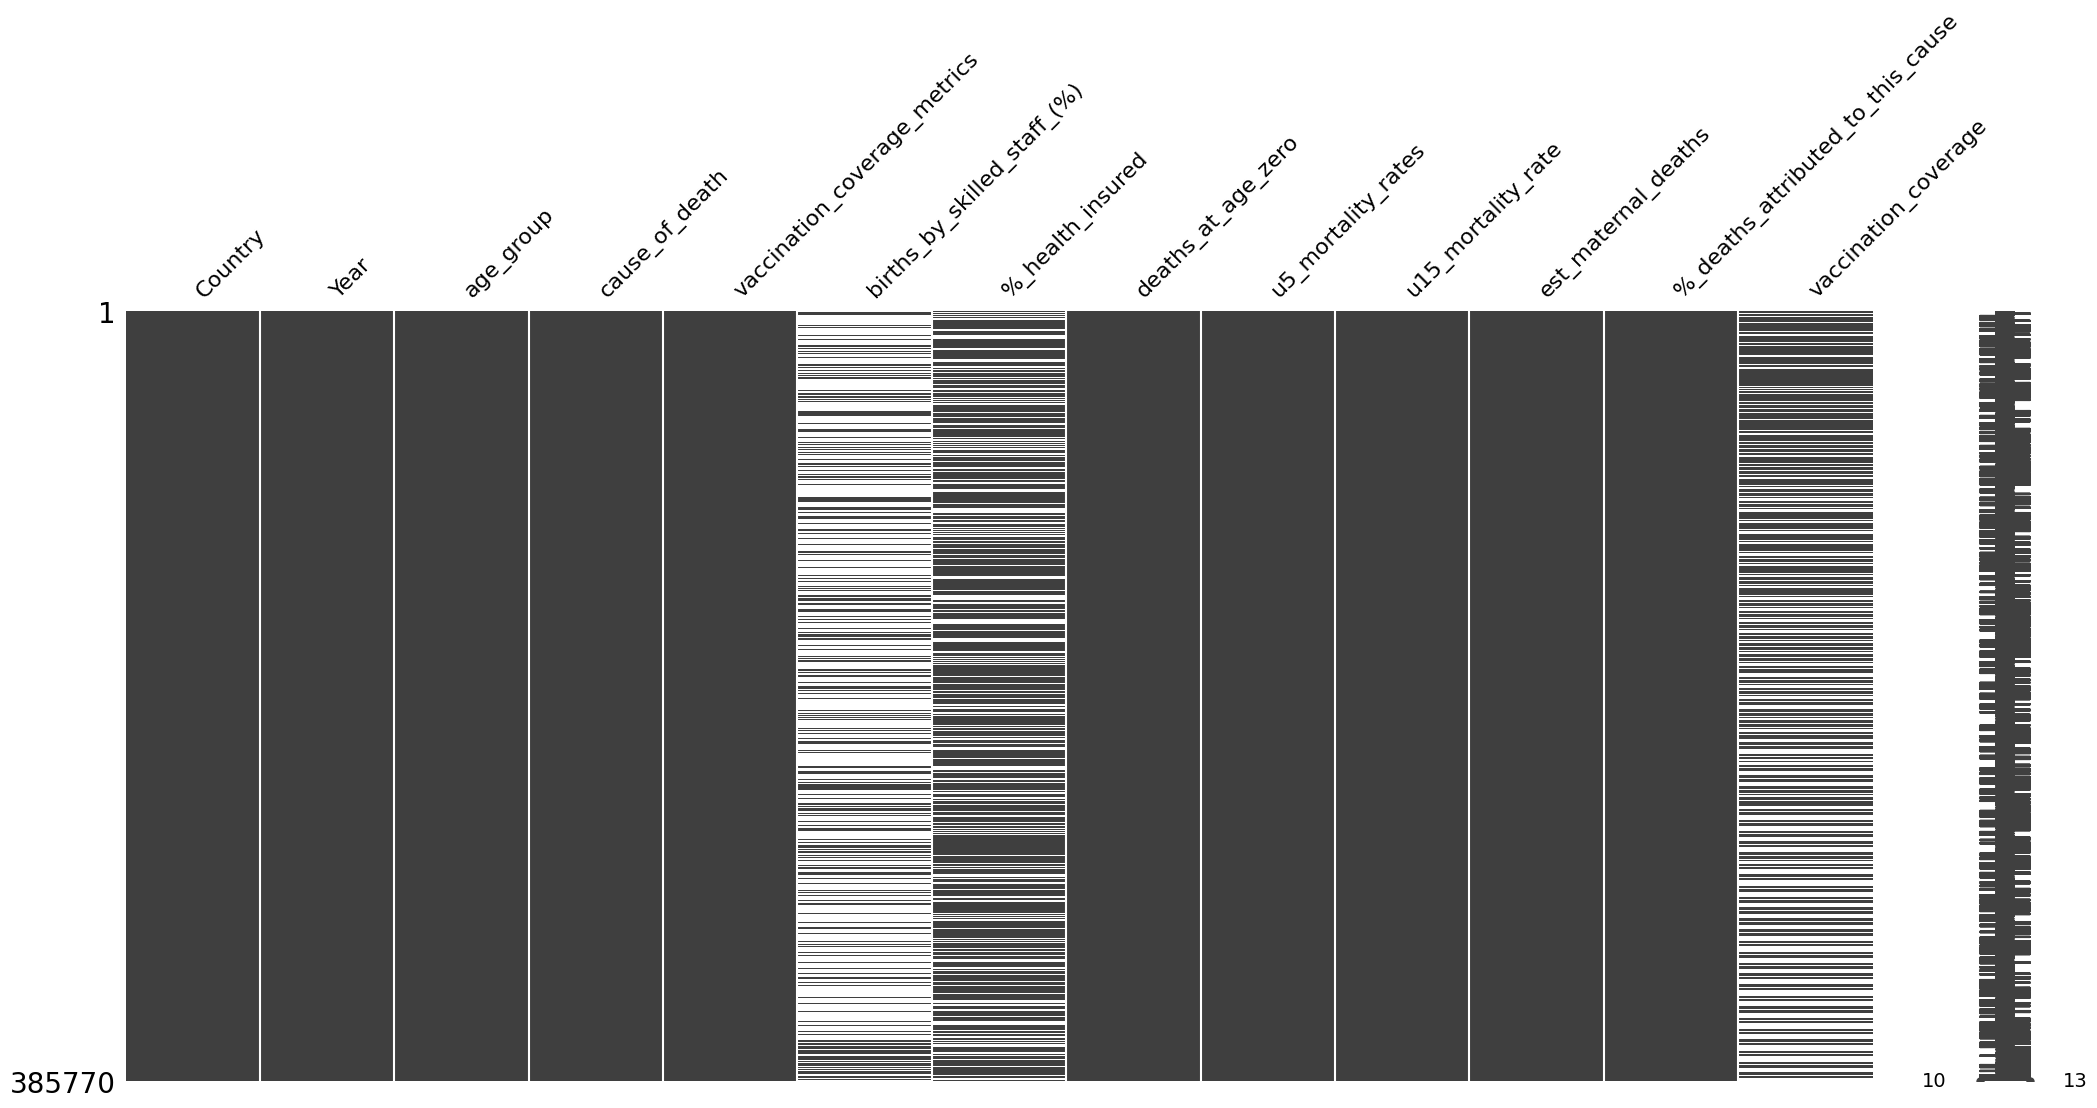

In [ ]:
msno.matrix(clean_data_africa)

In [ ]:
clean_data_africa.head()

,Country,Year,age_group,cause_of_death,vaccination_coverage_metrics,births_by_skilled_staff_(%),%_health_insured,deaths_at_age_zero,u5_mortality_rates,u15_mortality_rate,est_maternal_deaths,%_deaths_attributed_to_this_cause,vaccination_coverage
517,Algeria,2017,0-27 days,Other noncommunicable diseases,BCG,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.003,99.0
518,Algeria,2017,0-27 days,Other noncommunicable diseases,HepB3,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.003,91.0
519,Algeria,2017,0-27 days,Other noncommunicable diseases,Hib3,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.003,91.0
520,Algeria,2017,0-27 days,Other noncommunicable diseases,IPV1,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.003,92.0
521,Algeria,2017,0-27 days,Other noncommunicable diseases,MCV1,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.003,88.0


In [ ]:
clean_data_africa.Country.unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', "Cote d'Ivoire", 'Cape Verde', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo',
       'Democratic Republic of Congo', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa',
       'South Sudan', 'Togo', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [ ]:
round(clean_data_africa.isnull().mean(), 2)*100

,0
Country,0.0
Year,0.0
age_group,0.0
cause_of_death,0.0
vaccination_coverage_metrics,0.0
births_by_skilled_staff_(%),70.0
%_health_insured,27.0
deaths_at_age_zero,0.0
u5_mortality_rates,0.0
u15_mortality_rate,0.0


In [ ]:
clean_data_africa[clean_data_africa["vaccination_coverage"].isna()]

,Country,Year,age_group,cause_of_death,vaccination_coverage_metrics,births_by_skilled_staff_(%),%_health_insured,deaths_at_age_zero,u5_mortality_rates,u15_mortality_rate,est_maternal_deaths,%_deaths_attributed_to_this_cause,vaccination_coverage
525,Algeria,2017,0-27 days,Other noncommunicable diseases,RotaC,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.003,NaN
526,Algeria,2017,0-27 days,Other noncommunicable diseases,YFV,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.003,NaN
536,Algeria,2017,0-27 days,Injuries,RotaC,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.015,NaN
537,Algeria,2017,0-27 days,Injuries,YFV,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.015,NaN
547,Algeria,2017,0-27 days,HIV/AIDS,RotaC,NaN,85.2,21270.0,2.447241,2.794751,908.3727,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604451,Mauritius,2000,0-27 days,Prematurity,Hib3,99.7,100.0,331.0,1.883183,2.157084,10.4338,0.600,NaN
1604452,Mauritius,2000,0-27 days,Prematurity,IPV1,99.7,100.0,331.0,1.883183,2.157084,10.4338,0.600,NaN
1604454,Mauritius,2000,0-27 days,Prematurity,PCV3,99.7,100.0,331.0,1.883183,2.157084,10.4338,0.600,NaN
1604457,Mauritius,2000,0-27 days,Prematurity,RotaC,99.7,100.0,331.0,1.883183,2.157084,10.4338,0.600,NaN


I'll assume 0% vaccination coverage metrics for countries where there are none



In [ ]:
clean_data_africa["vaccination_coverage"] = clean_data_africa["vaccination_coverage"].fillna(0)
clean_data_africa["births_by_skilled_staff_(%)"] = clean_data_africa["births_by_skilled_staff_(%)"].fillna(0)
clean_data_africa["%_health_insured"] = clean_data_africa["%_health_insured"].fillna(0)


In [ ]:
clean_data_africa.head()

,Country,Year,age_group,cause_of_death,vaccination_coverage_metrics,births_by_skilled_staff_(%),%_health_insured,deaths_at_age_zero,u5_mortality_rates,u15_mortality_rate,est_maternal_deaths,%_deaths_attributed_to_this_cause,vaccination_coverage
517,Algeria,2017,0-27 days,Other noncommunicable diseases,BCG,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,99.0
518,Algeria,2017,0-27 days,Other noncommunicable diseases,HepB3,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,91.0
519,Algeria,2017,0-27 days,Other noncommunicable diseases,Hib3,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,91.0
520,Algeria,2017,0-27 days,Other noncommunicable diseases,IPV1,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,92.0
521,Algeria,2017,0-27 days,Other noncommunicable diseases,MCV1,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,88.0


In [ ]:
if not os.path.exists("cleaned_data"):
    os.makedirs("cleaned_data")
clean_data_africa.to_csv("cleaned_data/clean_data_africa.csv", index=False)

## ANALYSIS

In [ ]:
df = clean_data_africa.copy()

### Vaccination Impact:
How does vaccination coverage correlate with child mortality rates, particularly under-5 (U5) and under-15 (U15) mortality rates?

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

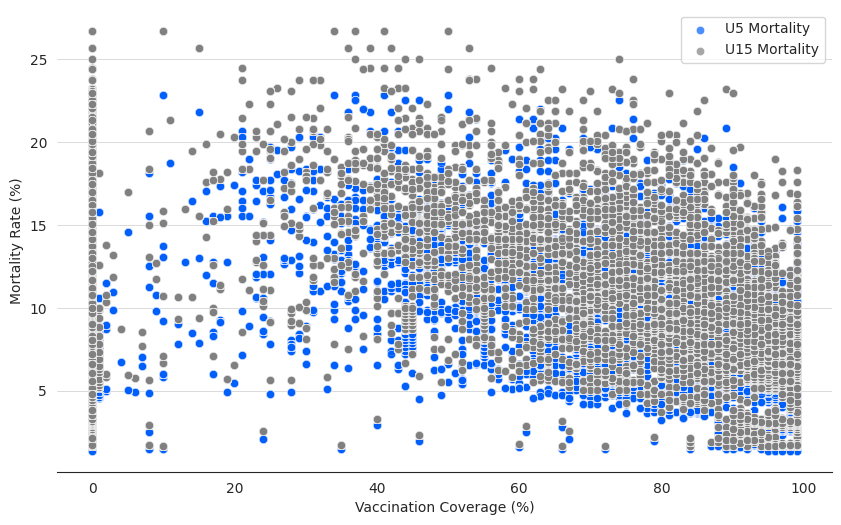

In [ ]:
# Set seaborn style
sns.set_style("white")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot U5 Mortality
sns.scatterplot(x='vaccination_coverage', y='u5_mortality_rates', data=df, alpha=0.7, label='U5 Mortality', color='#005FFB', ax=ax)

# Plot U15 Mortality
sns.scatterplot(x='vaccination_coverage', y='u15_mortality_rate', data=df, alpha=0.7, label='U15 Mortality', color='grey', ax=ax)

# Set title and labels
# ax.set_title('Vaccination Coverage vs Mortality Rates', fontsize=14)
ax.set_xlabel('Vaccination Coverage (%)', fontsize=10)
ax.set_ylabel('Mortality Rate (%)', fontsize=10,)
# Add thin horizontal grid lines
ax.grid(axis='y', linestyle='-', linewidth=0.5)

# Remove top and right spines
sns.despine(ax=ax, top=True, right=True, left=True)

# Add legend
ax.legend()

# Show the plot
plt.show()

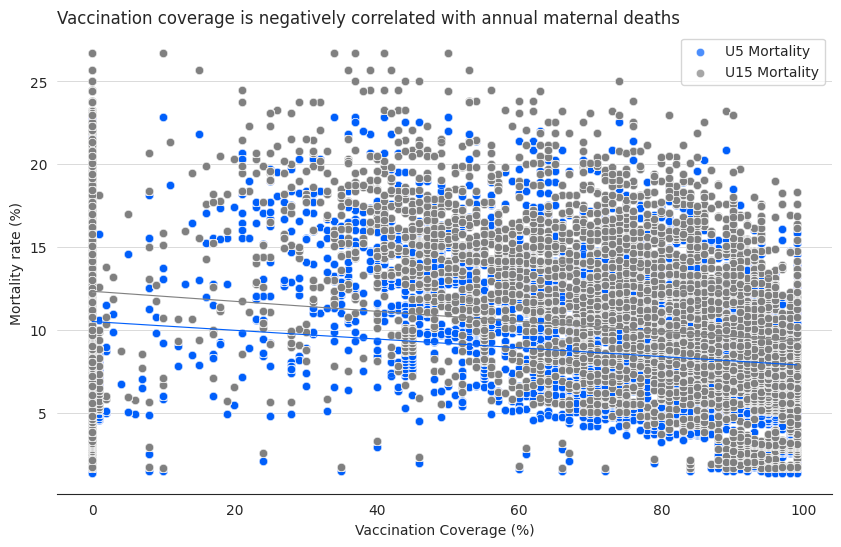

In [ ]:
# Set seaborn style
sns.set_style("white")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot U5 Mortality with regression line
sns.scatterplot(
    x='vaccination_coverage',
    y='u5_mortality_rates',
    data=df,
    alpha=0.7,
    label='U5 Mortality',
    color='#005FFB',
    ax=ax
)
sns.regplot(
    x='vaccination_coverage',
    y='u5_mortality_rates',
    data=df,
    scatter=False,
    color='#005FFB',
    ax=ax,
    line_kws={"linewidth": 0.8}
)

# Plot U15 Mortality with regression line
sns.scatterplot(
    x='vaccination_coverage',
    y='u15_mortality_rate',
    data=df,
    alpha=0.7,
    label='U15 Mortality',
    color='grey',
    ax=ax
)
sns.regplot(
    x='vaccination_coverage',
    y='u15_mortality_rate',
    data=df,
    scatter=False,
    color='grey',
    ax=ax,
    line_kws={"linewidth": 0.8}
)

# Set title and labels
plt.title("Vaccination coverage is negatively correlated with annual maternal deaths", loc='left')
ax.set_xlabel('Vaccination Coverage (%)', fontsize=10)
ax.set_ylabel('Mortality Rate (%)', fontsize=10)

# Add thin horizontal grid lines
ax.grid(axis='y', linestyle='-', linewidth=0.5)

# Remove top and right spines
sns.despine(ax=ax, top=True, right=True, left=True)

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
import scipy.stats as stats

# Calculate correlation and p-value for U5 Mortality
u5_corr, u5_p_value = stats.pearsonr(df['vaccination_coverage'], df['u5_mortality_rates'])

# Calculate correlation and p-value for U15 Mortality
u15_corr, u15_p_value = stats.pearsonr(df['vaccination_coverage'], df['u15_mortality_rate'])

# Print the results
print("Correlation between vaccination coverage and U5 mortality rates:")
print(f"Correlation Coefficient: {u5_corr:.2f}")
print(f"P-value: {u5_p_value:.2e} {'(Significant)' if u5_p_value < 0.05 else '(Not Significant)'}\n")

print("Correlation between vaccination coverage and U15 mortality rates:")
print(f"Correlation Coefficient: {u15_corr:.2f}")
print(f"P-value: {u15_p_value:.2e} {'(Significant)' if u15_p_value < 0.05 else '(Not Significant)'}")


Correlation between vaccination coverage and U5 mortality rates:
Correlation Coefficient: -0.25
P-value: 0.00e+00 (Significant)

Correlation between vaccination coverage and U15 mortality rates:
Correlation Coefficient: -0.25
P-value: 0.00e+00 (Significant)


### Maternal Health and Mortality:
Is there a significant relationship between births attended by skilled health staff and estimated maternal deaths?

In [ ]:
df.head()

,Country,Year,age_group,cause_of_death,vaccination_coverage_metrics,births_by_skilled_staff_(%),%_health_insured,deaths_at_age_zero,u5_mortality_rates,u15_mortality_rate,est_maternal_deaths,%_deaths_attributed_to_this_cause,vaccination_coverage
517,Algeria,2017,0-27 days,Other noncommunicable diseases,BCG,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,99.0
518,Algeria,2017,0-27 days,Other noncommunicable diseases,HepB3,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,91.0
519,Algeria,2017,0-27 days,Other noncommunicable diseases,Hib3,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,91.0
520,Algeria,2017,0-27 days,Other noncommunicable diseases,IPV1,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,92.0
521,Algeria,2017,0-27 days,Other noncommunicable diseases,MCV1,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,88.0


In [ ]:
df.head(3)

,Country,Year,age_group,cause_of_death,vaccination_coverage_metrics,births_by_skilled_staff_(%),%_health_insured,deaths_at_age_zero,u5_mortality_rates,u15_mortality_rate,est_maternal_deaths,%_deaths_attributed_to_this_cause,vaccination_coverage
517,Algeria,2017,0-27 days,Other noncommunicable diseases,BCG,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,99.0
518,Algeria,2017,0-27 days,Other noncommunicable diseases,HepB3,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,91.0
519,Algeria,2017,0-27 days,Other noncommunicable diseases,Hib3,0.0,85.2,21270.0,2.447241,2.794751,908.3727,0.003,91.0


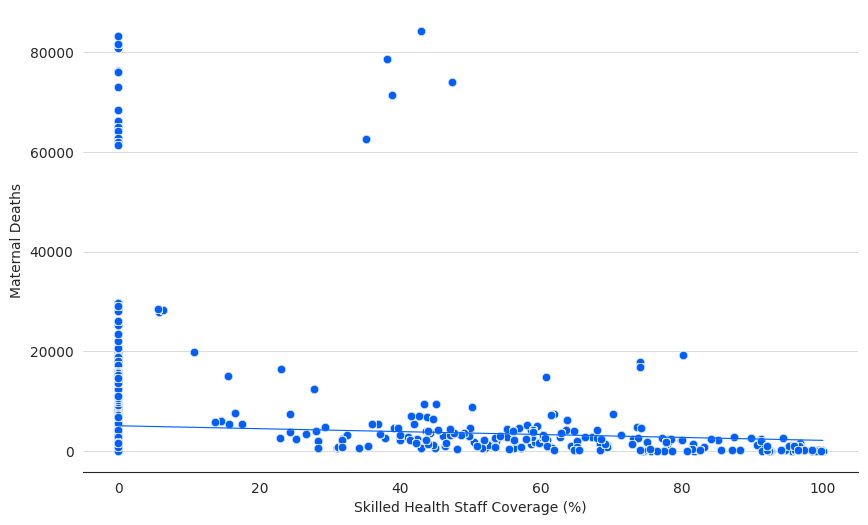

In [ ]:
# Set seaborn style
sns.set_style("white")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot U5 Mortality with regression line
sns.scatterplot(
    x='births_by_skilled_staff_(%)',
    y='est_maternal_deaths',
    data=df,
    alpha=0.7,
    color='#005FFB',
    ax=ax
)
sns.regplot(
    x='births_by_skilled_staff_(%)',
    y='est_maternal_deaths',
    data=df,
    scatter=False,
    color='#005FFB',
    ax=ax,
    line_kws={"linewidth": 0.8}
)





# Set title and labels
ax.set_xlabel('% of births by assisted by skilled staff', fontsize=10)
ax.set_ylabel('Maternal Deaths', fontsize=10)

# Add thin horizontal grid lines
ax.grid(axis='y', linestyle='-', linewidth=0.5)

# Remove top and right spines
sns.despine(ax=ax, top=True, right=True, left=True)

# Show the plot
plt.show()


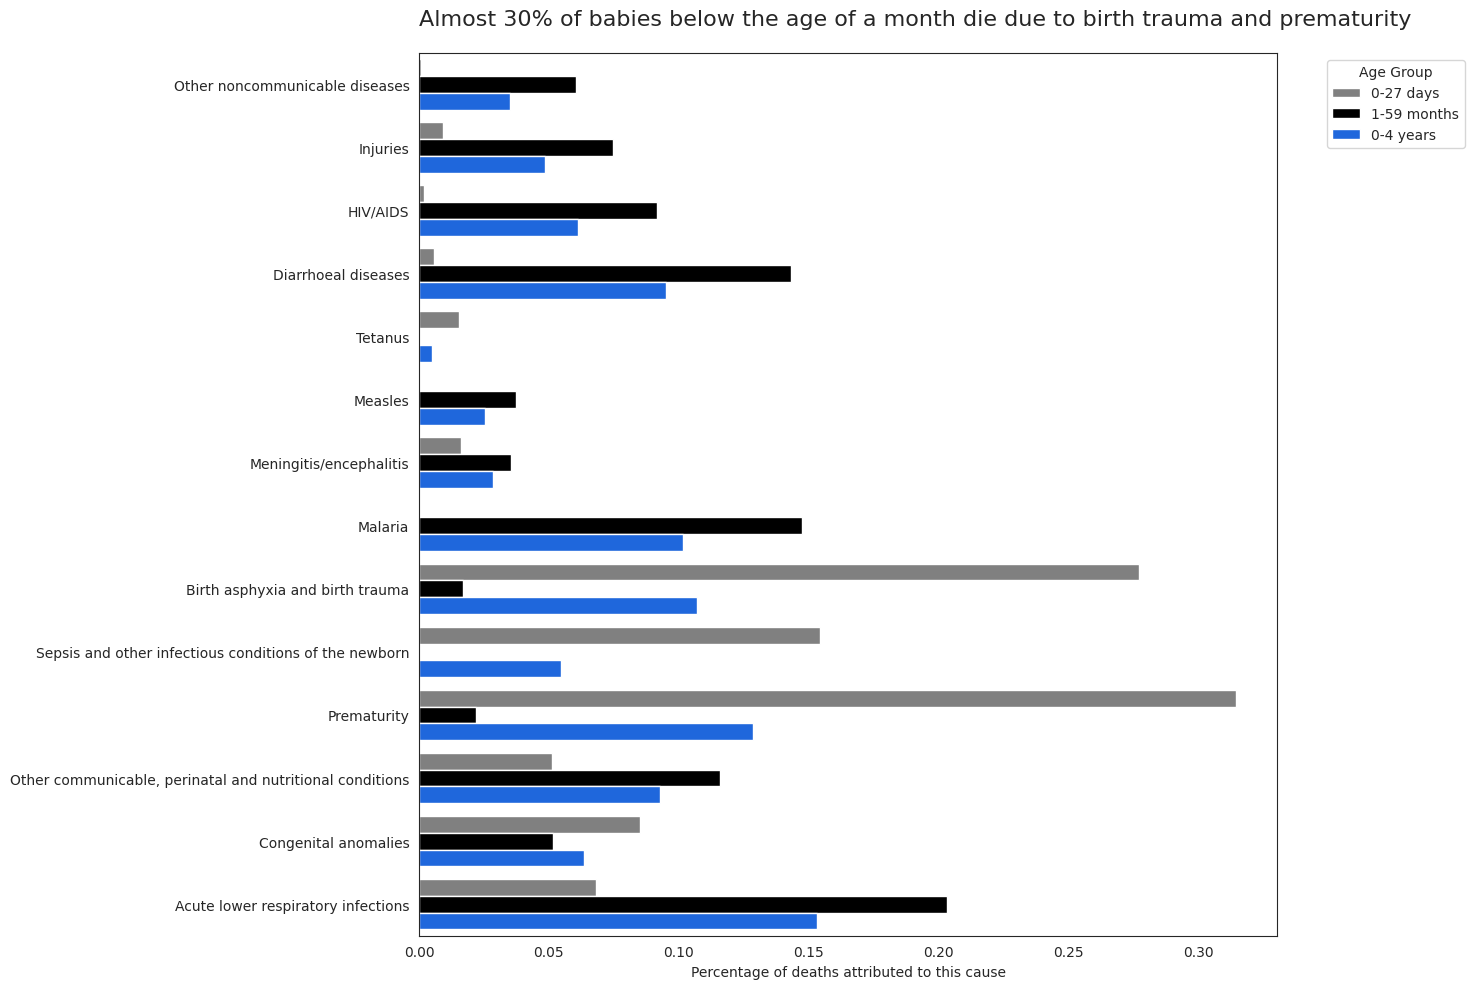

In [ ]:
# Get the top 5 countries with the highest u5_mortality_rate
top_5_countries = df.groupby('Country')['u5_mortality_rates'].mean().index.tolist()
country_data = df[df['Country'].isin(top_5_countries)]

# Create a bar plot for each country
age_group_colors = {
    '0-27 days': 'grey',  # Example color for Neonatal
    '1-59 months': 'black',    # Example color for Infant
    '0-4 years': '#005FFB',    # Example color for Child

}


plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.barplot(
    data=country_data,
    x='%_deaths_attributed_to_this_cause',
    y='cause_of_death',
    hue='age_group',
    palette=age_group_colors,
    errorbar=None
)
plt.title("Almost 30% of babies below the age of a month die due to birth trauma and prematurity", loc='left', fontsize=16, pad=20)
# Add thin horizontal grid lines
# ax.grid(axis='y', linestyle='-', linewidth=0.5)




plt.xlabel("Percentage of deaths attributed to this cause")
plt.ylabel("")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Add thin horizontal grid lines
ax.grid(axis='y', linestyle='-', linewidth=0.5)

# Remove top and right spines
sns.despine(ax=ax, top=True, right=True, left=True)
plt.show()

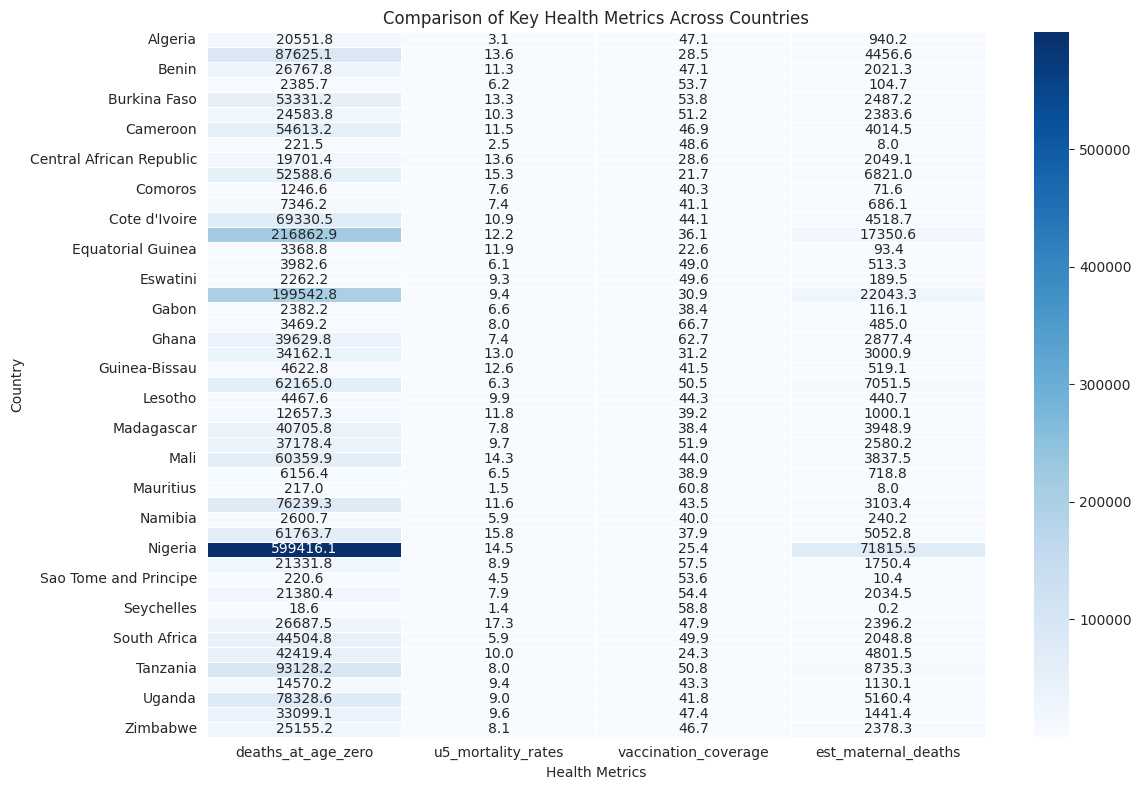

In [ ]:
metrics = ['deaths_at_age_zero', 'u5_mortality_rates', 'vaccination_coverage', 'est_maternal_deaths']
heatmap_data = df.groupby('Country')[metrics].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".1f", linewidths=.5)
plt.title("Comparison of Key Health Metrics Across Countries")
plt.xlabel("Health Metrics")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


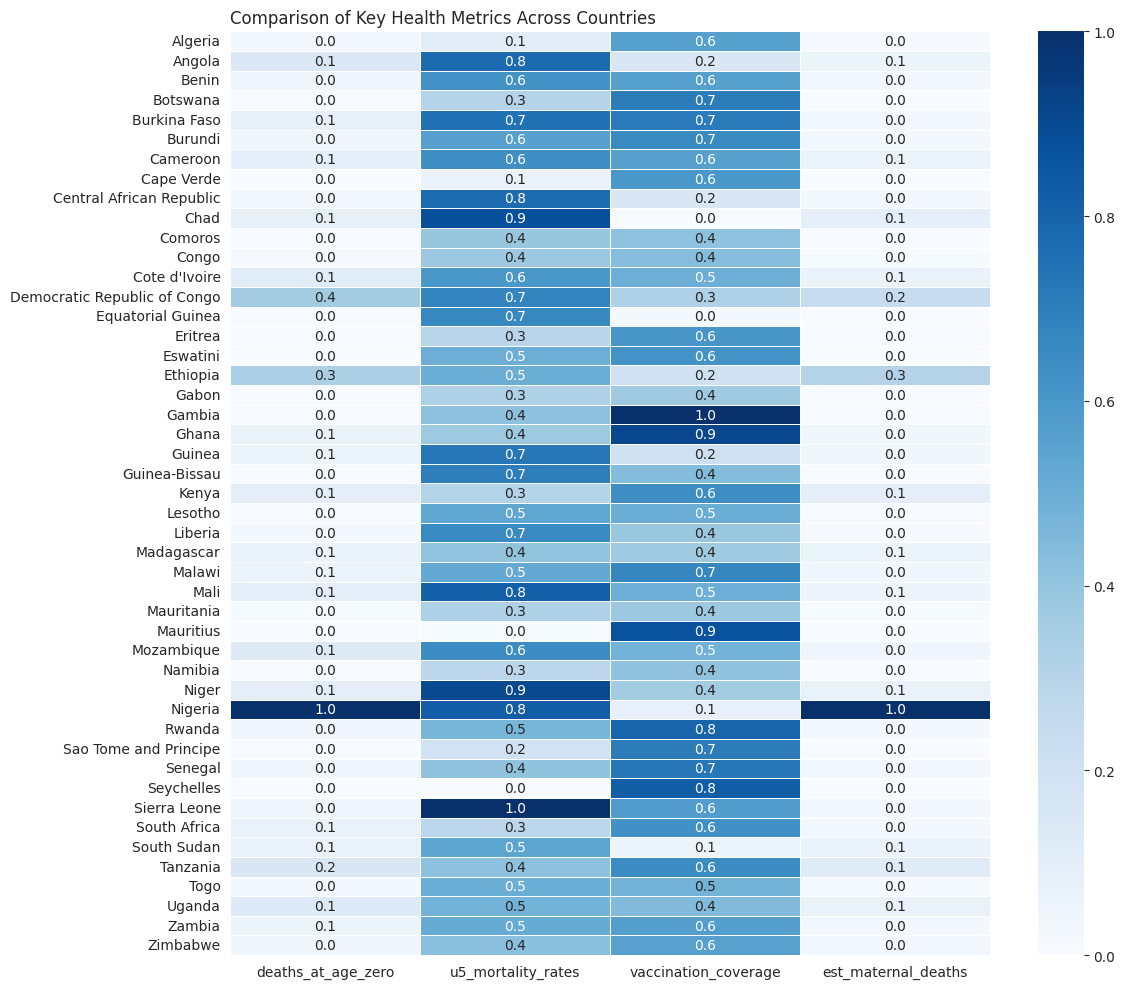

In [ ]:
metrics = ['deaths_at_age_zero', 'u5_mortality_rates', 'vaccination_coverage', 'est_maternal_deaths']
heatmap_data = df.groupby('Country')[metrics].mean()

# Normalize values for each metric
normalized_data = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(12, 10))
sns.heatmap(normalized_data, cmap='Blues', annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=1)
plt.title("Comparison of Key Health Metrics Across Countries", loc='left')
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
 df.groupby('Country')['u5_mortality_rates'].mean().nlargest(5)

,u5_mortality_rates
Country,
Sierra Leone,17.289210
Niger,15.793426
Chad,15.316489
Nigeria,14.522910
Mali,14.340936


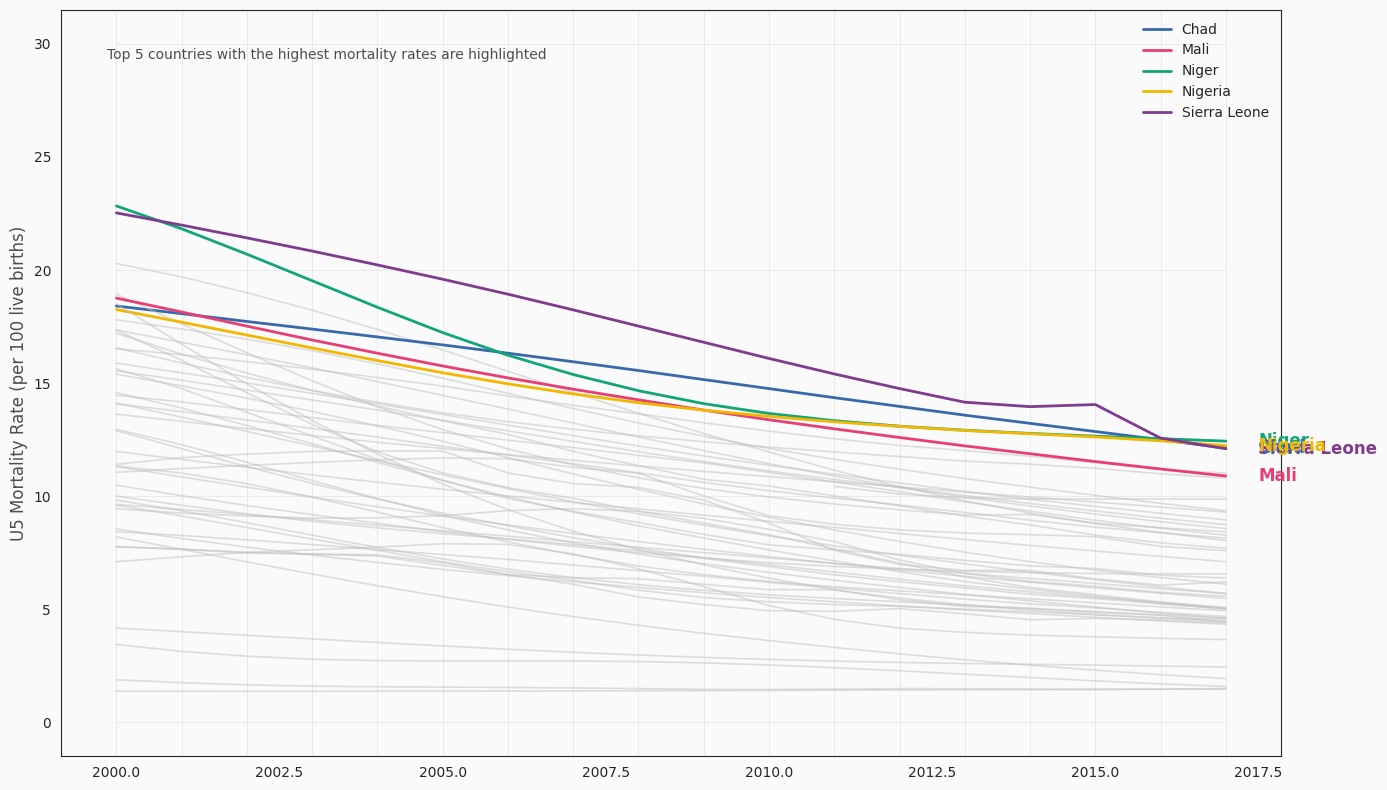

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset is named df
# Top 10 countries with highest average u5_mortality_rates
top_countries = df.groupby('Country')['u5_mortality_rates'].mean().index
highlight_countries = df.groupby('Country')['u5_mortality_rates'].mean().nlargest(10).index[:5]  # Highlight top 5

# Create group column to differentiate between highlighted and other countries
df['group'] = np.where(df['Country'].isin(highlight_countries), df['Country'], 'other')

# Colors for the highlighted countries
COLOR_SCALE = ['#7F3C8D', '#11A579', '#3969AC', '#F2B701', '#E73F74']
GREY75 = "#bfbfbf"

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Set the background color
fig.patch.set_facecolor('#fafafa')
ax.set_facecolor('#fafafa')

# Add vertical gridlines for each Year (assuming the Years are a column in the dataset)
Years = df['Year'].unique()
for Year in Years:
    ax.axvline(Year, color='#e8e8e8', lw=0.6, zorder=0)

# Horizontal gridlines
ax.hlines(y=np.arange(0, df['u5_mortality_rates'].max() + 10, 10),
          xmin=df['Year'].min(), xmax=df['Year'].max(), color='#e8e8e8', lw=0.6)

# Plot lines for each Country
for Country in top_countries:
    data = df[df['Country'] == Country]
    if Country in highlight_countries:
        idx = list(highlight_countries).index(Country)
        ax.plot(data['Year'], data['u5_mortality_rates'], color=COLOR_SCALE[idx], lw=2, label=Country)
    else:
        ax.plot(data['Year'], data['u5_mortality_rates'], color=GREY75, lw=1.2, alpha=0.5)

# Add labels and annotations
for idx, Country in enumerate(highlight_countries):
    data = df[(df['Country'] == Country) & (df['Year'] == df['Year'].max())]
    x_end = data['Year'].values[0]
    y_end = data['u5_mortality_rates'].values[0]
    ax.text(x_end + 0.5, y_end, Country, color=COLOR_SCALE[idx], fontsize=12, fontweight='bold', va='center')

# Axis labels and customization
ax.set_ylabel("U5 Mortality Rate (per 100 live births)", fontsize=12, color='#4d4d4d')
# ax.set_xlabel("Year", fontsize=12, color='#4d4d4d')

# Legend for highlighted countries
ax.legend(loc='upper right', fontsize=10, frameon=False)

# Title and subtitle
## ax.set_title("Evolution of U5 Mortality Rate (Top 10 Countries)", fontsize=16, weight='bold', color='#1a1a1a')
fig.text(0.08, 0.92, "Top 5 countries with the highest mortality rates are highlighted",
         fontsize=10, color='#4d4d4d')

plt.tight_layout()
plt.show()



In [ ]:
# Define regional lists
west_african = ['Benin', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']
north_african = ['Algeria']
central_africa = ["Central African Republic", 'Congo', 'Democratic Republic of Congo', 'Equatorial Guinea',
       'Gabon', 'Sao Tome and Principe', 'Chad', "Cameroon"]
east_african = ['Burundi', 'Comoros', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda', 'Seychelles', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe']
southern_african = ['Angola', 'Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa']

# Create a dictionary mapping countries to regions
country_to_region = {}
for country in west_african:
    country_to_region[country] = 'West Africa'
for country in north_african:
    country_to_region[country] = 'North Africa'
for country in east_african:
    country_to_region[country] = 'East Africa'
for country in southern_african:
    country_to_region[country] = 'Southern Africa'
for country in central_africa:
    country_to_region[country] = 'Central Africa'

# Create the 'region' column using the mapping
df['region'] = df['Country'].map(country_to_region)

In [ ]:
df.columns

Index(['Country', 'Year', 'age_group', 'cause_of_death',
       'vaccination_coverage_metrics', 'births_by_skilled_staff_(%)',
       '%_health_insured', 'deaths_at_age_zero', 'u5_mortality_rates',
       'u15_mortality_rate', 'est_maternal_deaths',
       '%_deaths_attributed_to_this_cause', 'vaccination_coverage',
       'coverage_category', 'group', 'region'],
      dtype='object')

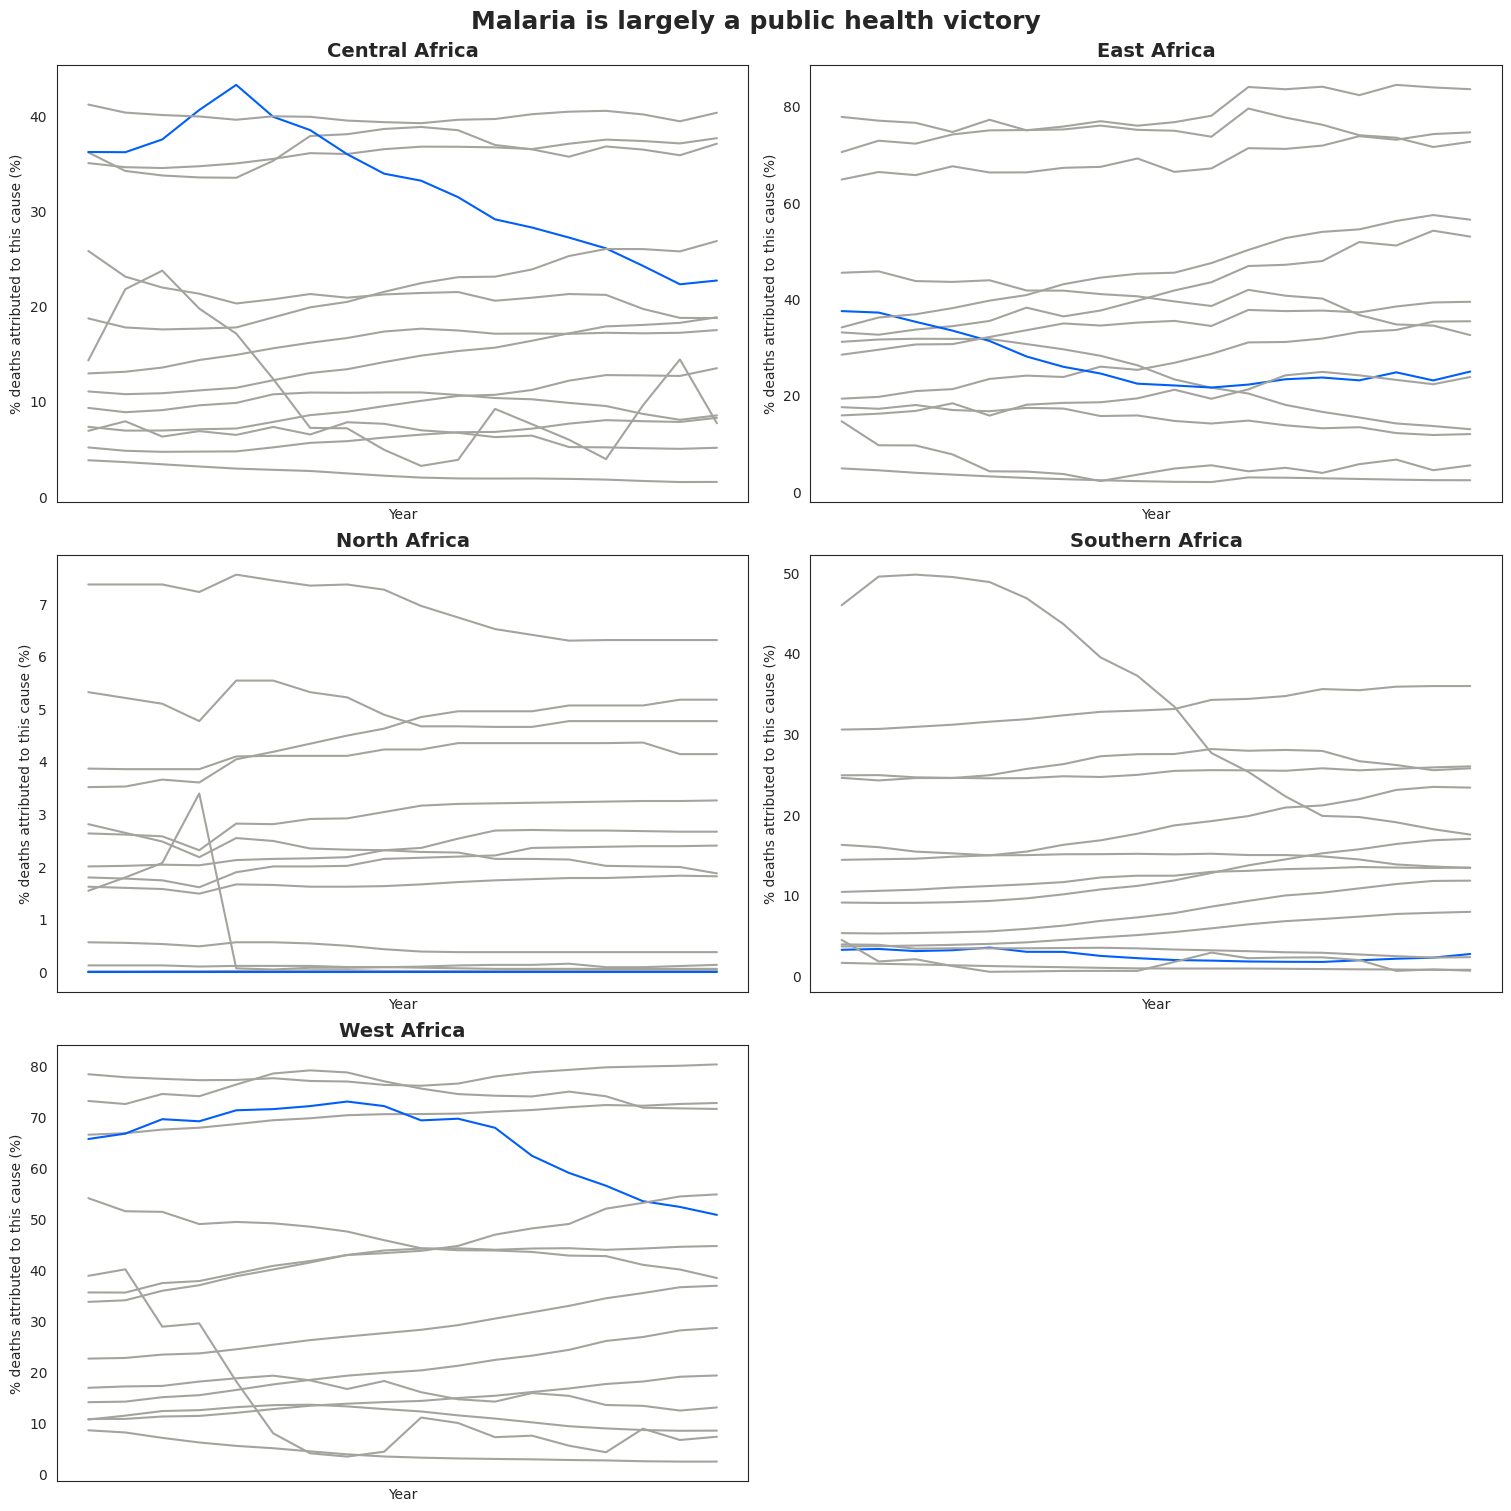

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Assuming your DataFrame is called df with the '%_deaths_attributed_to_this_cause' column
# Group the data by region, cause_of_death, and Year to get the sum of percentages
df_grouped = df.groupby(['region', 'cause_of_death', 'Year'])['%_deaths_attributed_to_this_cause'].sum().reset_index()

# Pivot the DataFrame for easier plotting
df_pivot = df_grouped.pivot(index='Year', columns=['region', 'cause_of_death'], values='%_deaths_attributed_to_this_cause').fillna(0)

# Initialize the subplots for regions with 3x3 grid
num_regions = len(df_grouped['region'].unique())
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), constrained_layout=True)

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Plot data for each region
for i, region in enumerate(df_grouped['region'].unique()):
    ax = axes[i]
    region_data = df_grouped[df_grouped['region'] == region]

    # Pivot for each region
    region_pivot = region_data.pivot(index='Year', columns='cause_of_death', values='%_deaths_attributed_to_this_cause').fillna(0)

    # Plot each cause of death with grey lines, and malaria in light blue
    for cause in region_pivot.columns:
        color = '#005FFB' if cause == 'Malaria' else '#A5A39E'
        ax.plot(region_pivot.index, region_pivot[cause], color=color)

    # Enhance visualization
    ax.set_title(f'{region}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('% deaths attributed to this cause (%)')
    ax.grid(False)  # Turn off grid lines
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add a supertitle for the entire figure
fig.suptitle('Malaria is largely a public health victory', fontsize=18, fontweight='bold')
if num_regions < len(axes):  # Check if there are extra subplots
    for i in range(num_regions, len(axes)):
        fig.delaxes(axes[i])
# Show the plot
plt.show()
